In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#import graphviz
#from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline
from vecstack import stacking
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the csv 
data = pd.read_csv('bank-additional-full.csv', na_values='unknown')
pd.options.display.max_columns = None

### Exploratory Data Analysis

In [3]:
data.head()

,customer_no,age,job,marital,education,credit_default,housing,loan,contact,contacted_month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,2,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,3,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,5,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.describe()

,customer_no,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,20594.50000,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,11890.09578,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,1.00000,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,10297.75000,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,20594.50000,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,30891.25000,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,41188.00000,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
data.shape

(41188, 22)

In [6]:
#Defining a function to perform basic EDA
def dataFunc(df):
    for i in df.columns:
        print('\033[1m',i,'\033[0m',':', df[i].dtype)
        print(df[i].nunique())
        print(df[i].value_counts())
        print('______________________')

In [7]:
#Calling the function
dataFunc(data)

 customer_no  : int64
41188
2047     1
36091    1
40281    1
38232    1
11599    1
        ..
33445    1
35492    1
21151    1
23198    1
2049     1
Name: customer_no, Length: 41188, dtype: int64
______________________
 age  : int64
78
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64
______________________
 job  : object
11
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64
______________________
 marital  : object
3
married     24928
single      11568
divorced     4612
Name: marital, dtype: int64
______________________
 education  : object
8
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
b

In [8]:
#Defining a function for typecasting categorical variable
def catCols(df):
    for i in df.columns:
        if(df[i].dtype == 'object'):
            df[i] = df[i].astype('category')
    print(df.dtypes)
            

In [9]:
data.dtypes

customer_no          int64
age                  int64
job                 object
marital             object
education           object
credit_default      object
housing             object
loan                object
contact             object
contacted_month     object
day_of_week         object
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome            object
emp_var_rate       float64
cons_price_idx     float64
cons_conf_idx      float64
euribor3m          float64
nr_employed        float64
y                   object
dtype: object

In [10]:
#Calling the function to type cast
catCols(data)

customer_no           int64
age                   int64
job                category
marital            category
education          category
credit_default     category
housing            category
loan               category
contact            category
contacted_month    category
day_of_week        category
duration              int64
campaign              int64
pdays                 int64
previous              int64
poutcome           category
emp_var_rate        float64
cons_price_idx      float64
cons_conf_idx       float64
euribor3m           float64
nr_employed         float64
y                  category
dtype: object


In [11]:
#Dropping Customer Id.
data.drop('customer_no', axis=1, inplace = True)
data.shape

(41188, 21)

In [12]:
data.head(1)

,age,job,marital,education,credit_default,housing,loan,contact,contacted_month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
#Among the categorical variables, education has many values which are irrelevant for the problem statement. Values like basic4y,
#basic.6y and basic.9y can be clubbed together and just called as Basic.
data.education.unique()

['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', NaN, 'university.degree', 'phd', 'illiterate']
Categories (8, object): ['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'university.degree', 'phd', 'illiterate']

In [14]:
#Clubbing together into one single value called Basic
data['education'] = np.where(data.education == 'basic.4y', 'Basic', data.education)
data['education'] = np.where(data.education == 'basic.6y', 'Basic', data.education)
data['education'] = np.where(data.education == 'basic.9y', 'Basic', data.education)

In [15]:
data.education.unique()

array(['Basic', 'high.school', 'professional.course', nan,
       'university.degree', 'phd', 'illiterate'], dtype=object)

In [16]:
#Identifying the remaining numerical columns
numList = data.select_dtypes(exclude = 'category')
numList

,age,education,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,56,Basic,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,high.school,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,high.school,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,Basic,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,high.school,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...
41183,73,professional.course,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,professional.course,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,university.degree,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,professional.course,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [17]:
#Among the numerical variables, pdays stands out with a dominant value of 999 which basically means that the customer
#has never been contacted whereas the rest of values indicate the days lapsed since the last contact. From a business perspective
#it would make more sense if the column indicates whether the customer has been contacted or not. Besides, the higher numerical
#value of 999 could be misleading in modeling the data.
data.pdays.value_counts()
data.pdays.unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [18]:
data.pdays = data.pdays.replace(999, 'No')
data.pdays = data.pdays.replace([6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], 'Yes')

In [19]:
data.pdays.value_counts()

No     39673
Yes     1515
Name: pdays, dtype: int64

In [20]:
#Convert pdays to categorical
data.pdays = data.pdays.astype('category')

In [21]:
#Exploring the target variable. The classes are highly imbalanced with 89:11 ratio of non-subscriptions to subscriptions.
data.y.value_counts(normalize = True)*100

no     88.734583
yes    11.265417
Name: y, dtype: float64

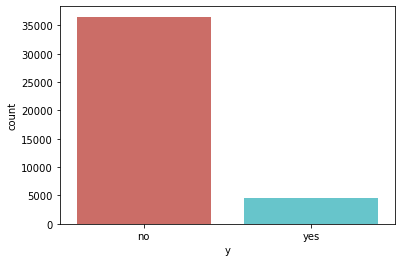

In [22]:
#A visual representation of the imbalanced target variable will help give an idea to business.
sns.countplot(x = 'y', data = data, palette='hls')

In [23]:
#Further exploration of target variable in relation to the independent variables in the dataset, reveals some intersting insights.
#1. The average age of customers who bought the term deposit is higher than those who did not.
#2. The average call duration is self-explanatory wherein it is higher for yay sayers vs lower for nay sayers.
#3. The average campaign times is lower for those who bought the term deposit.
data.groupby('y').mean()

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,
no,39.911185,220.844807,2.633085,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [24]:
data.groupby('job').mean()

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
job,,,,,,,,,
admin.,38.187296,254.312128,2.623489,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350
blue-collar,39.555760,264.542360,2.558461,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150
entrepreneur,41.723214,263.267857,2.535714,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530
housemaid,45.500000,250.454717,2.639623,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623
management,42.362859,257.058140,2.476060,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513
retired,62.027326,273.712209,2.476744,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151
self-employed,39.949331,264.142153,2.660802,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384
services,37.926430,258.398085,2.587805,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126
student,25.894857,283.683429,2.104000,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086


In [25]:
data.groupby('marital').mean()

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
marital,,,,,,,,,
divorced,44.899393,253.790330,2.61340,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643
married,42.307165,257.438623,2.57281,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772
single,33.158714,261.524378,2.53380,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265


In [26]:
data.groupby('education').mean()

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
education,,,,,,,,,
Basic,42.163910,263.043874,2.559498,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113
high.school,37.998213,260.886810,2.568576,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735
illiterate,48.500000,276.777778,2.277778,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778
phd,40.666667,187.333333,1.333333,0.000000,1.100000,93.994000,-36.400000,4.857000,5191.000000
professional.course,40.080107,252.533855,2.586115,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979
university.degree,38.879191,253.223373,2.563527,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298


### Data Visualizations

Text(0, 0.5, 'Frequency of Purchase')

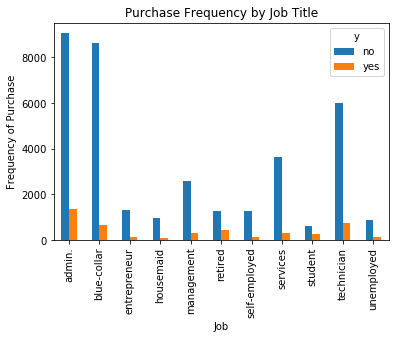

In [27]:
#Purchase frequency by Job title - The frequency of purchase does depend on job title with Admins being major purchasers. 
#Thus jobs can be a valid predictor of the dependent variable.
pd.crosstab(data.job, data.y).plot(kind = 'bar')
plt.title('Purchase Frequency by Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Proportion of Buyers')

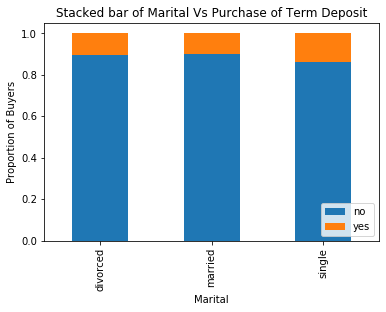

In [28]:
#Visualizing the marital column against dependent variable.With negligible variation, the marital status does not seem to be 
# a strong predictor of the dependent variable.
stacked_bar = pd.crosstab(data.marital, data.y)
stacked_bar.div(stacked_bar.sum(1).astype('float'), axis=0).plot(kind='bar', stacked=True)
plt.legend(loc='lower right')
plt.title('Stacked bar of Marital Vs Purchase of Term Deposit')
plt.xlabel('Marital')
plt.ylabel('Proportion of Buyers')

Text(0.5, 1.0, 'Proportion of Buyers Vs Educational Status')

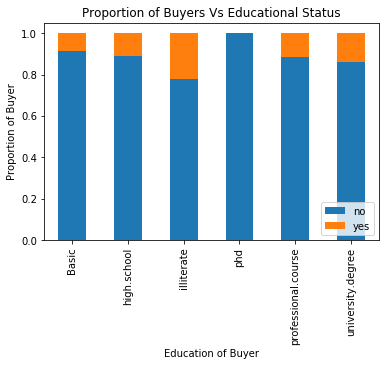

In [29]:
#Visualizing Education against target variable reveals some interesting insights.
#Illiterates are the highest buyers whereas phd holders do not have subscriptions. Education seems to be a valid predictor.
edu_fig = pd.crosstab(data.education, data.y)
edu_fig.div(edu_fig.sum(1).astype('float'), axis=0).plot(kind = 'bar', stacked = True)
plt.legend(loc='lower right')
plt.xlabel('Education of Buyer')
plt.ylabel('Proportion of Buyer')
plt.title('Proportion of Buyers Vs Educational Status')

Text(0, 0.5, 'Purchase Frequency')

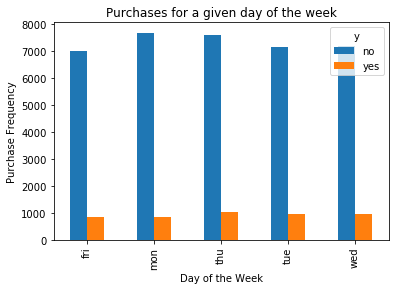

In [30]:
#With little variance, Day of the Week may not be a good predictor.
pd.crosstab(data.day_of_week, data.y).plot(kind='bar')
plt.title('Purchases for a given day of the week')
plt.xlabel('Day of the Week')
plt.ylabel('Purchase Frequency')

Text(0, 0.5, 'Frequency of Purchase')

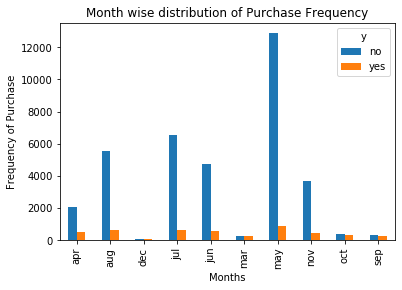

In [32]:
#Month could be a good predictor of the target variable
pd.crosstab(data.contacted_month, data.y).plot(kind='bar')
plt.title('Month wise distribution of Purchase Frequency')
plt.xlabel('Months')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency')

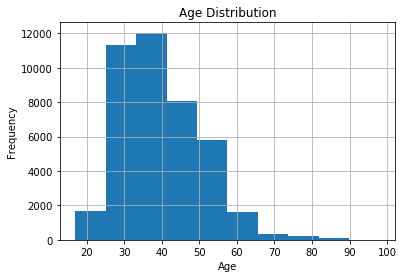

In [33]:
#Distribution of Age variable reveals that most of the customers of the bank are between 30 and 40 group.
data.age.hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency of Purchase')

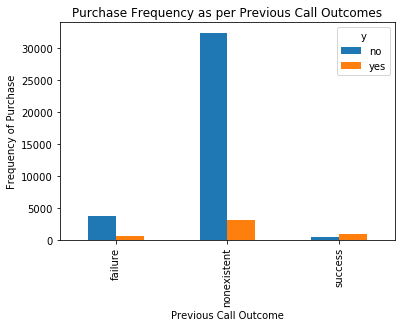

In [34]:
#poutcome variable seems to be a good predictor of target.
pd.crosstab(data.poutcome, data.y).plot(kind='bar')
plt.title('Purchase Frequency as per Previous Call Outcomes')
plt.xlabel('Previous Call Outcome')
plt.ylabel('Frequency of Purchase')

In [35]:
data.dtypes

age                   int64
job                category
marital            category
education            object
credit_default     category
housing            category
loan               category
contact            category
contacted_month    category
day_of_week        category
duration              int64
campaign              int64
pdays              category
previous              int64
poutcome           category
emp_var_rate        float64
cons_price_idx      float64
cons_conf_idx       float64
euribor3m           float64
nr_employed         float64
y                  category
dtype: object

In [36]:
#Checking missing values
data.isna().sum()

age                   0
job                 330
marital              80
education          1728
credit_default     8597
housing             990
loan                990
contact               0
contacted_month       0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp_var_rate          0
cons_price_idx        0
cons_conf_idx         0
euribor3m             0
nr_employed           0
y                     0
dtype: int64

In [37]:
#Since the missing values are less than 5% for most of the variables, we will drop the rows that are less than 5% and impute
#that are more than 5% (credit_default).
data.isnull().mean()*100

age                 0.000000
job                 0.801204
marital             0.194231
education           4.195397
credit_default     20.872584
housing             2.403613
loan                2.403613
contact             0.000000
contacted_month     0.000000
day_of_week         0.000000
duration            0.000000
campaign            0.000000
pdays               0.000000
previous            0.000000
poutcome            0.000000
emp_var_rate        0.000000
cons_price_idx      0.000000
cons_conf_idx       0.000000
euribor3m           0.000000
nr_employed         0.000000
y                   0.000000
dtype: float64

In [38]:
#droping rows less than 5%.
data.dropna(subset = ['job', 'marital', 'education', 'housing', 'loan'], inplace = True)

In [39]:
data.isna().sum()

age                   0
job                   0
marital               0
education             0
credit_default     7758
housing               0
loan                  0
contact               0
contacted_month       0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp_var_rate          0
cons_price_idx        0
cons_conf_idx         0
euribor3m             0
nr_employed           0
y                     0
dtype: int64

In [40]:
pd.value_counts(data.credit_default)

no     30487
yes        3
Name: credit_default, dtype: int64

In [61]:
#Simple imputation of missing values. As credit_default is a categorical variable, we shall use most frequent as strategy.
#data.credit_default.value_counts()

# Imp = SimpleImputer(strategy='most_frequent')
# #Imp.fit(data['credit_default'].values.reshape(-1,1))
# Imp.fit(pd.DataFrame(data.credit_default))
# #data.credit_default.reshape(-1,1)
# data = Imp.transform(np.array(data.credit_default))

In [41]:
data.credit_default.fillna(data['credit_default'].mode()[0], inplace = True)

In [42]:
data.dtypes

age                   int64
job                category
marital            category
education            object
credit_default     category
housing            category
loan               category
contact            category
contacted_month    category
day_of_week        category
duration              int64
campaign              int64
pdays              category
previous              int64
poutcome           category
emp_var_rate        float64
cons_price_idx      float64
cons_conf_idx       float64
euribor3m           float64
nr_employed         float64
y                  category
dtype: object

In [43]:
# #Reconverting them back to their original dtypes.
# #print(numList.columns)
# numList = ['age', 'duration', 'campaign', 'previous',
#        'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
#        'nr_employed']
# data[numList] = data[numList].astype('float')
# data[numList] = data[numList].astype('int64')
# catList = data.select_dtypes('object')
# print(catList.columns)
# catList = ['job', 'marital', 'education', 'credit_default',
#        'housing', 'loan', 'contact', 'contacted_month', 'day_of_week', 'pdays',
#        'poutcome', 'y']
# data[catList] = data[catList].astype('category')
# data.iloc[:, 15:20] = data.iloc[:, 15:20].astype('float64')
# data.dtypes

In [44]:
data.isnull().sum()

age                0
job                0
marital            0
education          0
credit_default     0
housing            0
loan               0
contact            0
contacted_month    0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
emp_var_rate       0
cons_price_idx     0
cons_conf_idx      0
euribor3m          0
nr_employed        0
y                  0
dtype: int64

In [45]:
data.y.unique()

['no', 'yes']
Categories (2, object): ['no', 'yes']

In [46]:
#Train Test Split
y = data.y
X = data.drop('y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=123, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train.head(2)

(26773, 20)
(11475, 20)
(26773,)
(11475,)


,age,job,marital,education,credit_default,housing,loan,contact,contacted_month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
27416,31,self-employed,single,university.degree,no,no,no,cellular,nov,fri,906,1,No,1,failure,-0.1,93.200,-42.0,4.021,5195.8
22092,31,admin.,single,university.degree,no,yes,no,cellular,aug,wed,77,3,No,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1


In [47]:
#Standardizing numerical variables
numVars = list(X_train.select_dtypes(include = ['int64', 'float64']))
#X_train[numVars].columns
standardizer = StandardScaler()
standardizer.fit(X_train[numVars])
X_train_num = pd.DataFrame(standardizer.transform(X_train[numVars]), columns= X_train[numVars].columns)
X_test_num = pd.DataFrame(standardizer.transform(X_test[numVars]), columns = X_test[numVars].columns)

In [48]:
X_train_num.head()
X_test_num.head()

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,-0.765198,-0.187746,-0.205099,-0.352518,-1.193219,-1.168803,-1.218840,-1.339841,-0.946911
1,-1.447362,0.920514,-0.563223,-0.352518,-1.193219,-1.168803,-1.218840,-1.335225,-0.946911
2,0.306774,-0.604792,0.153025,-0.352518,0.846380,0.610698,-0.463670,0.777846,0.850868
3,1.281293,-0.782423,0.511149,-0.352518,0.655168,0.742641,0.895636,0.717835,0.333833
4,-1.155006,-0.566177,-0.563223,-0.352518,0.846380,0.610698,-0.463670,0.779000,0.850868


In [428]:
# #Categorical Variable Encoding
# catVars = list(X_train.select_dtypes(include = 'category'))
# enc = OneHotEncoder()
# enc.fit(X_train[catVars])
# columns_enc = list(enc.get_feature_names(catVar))
# X_train[catVars].shape
# #X_train_cat = enc.transform(X_train[catVars])
# #X_test_cat = enc.transform(X_test[catVars])
# #X_train_cat = pd.DataFrame(X_train_cat.todense(), columns = X_train[catVars].columns)
# #X_train_cat = pd.DataFrame(enc.transform(X_train[catVars]), columns = X_train[catVars].columns)
# X_train[catVars].head()


In [311]:
#Categorical Variable Encoding
catVars = list(X_train.select_dtypes(include = 'category'))
print(catVars)
#X_train[catVars].head()
OHE = OneHotEncoder()
OHE.fit(X_train[catVars])
columns_ohe = list(OHE.get_feature_names(catVars))
print(columns_ohe)

['job', 'marital', 'credit_default', 'housing', 'loan', 'contact', 'contacted_month', 'day_of_week', 'pdays', 'poutcome']
['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_single', 'credit_default_no', 'credit_default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contacted_month_apr', 'contacted_month_aug', 'contacted_month_dec', 'contacted_month_jul', 'contacted_month_jun', 'contacted_month_mar', 'contacted_month_may', 'contacted_month_nov', 'contacted_month_oct', 'contacted_month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'pdays_No', 'pdays_Yes', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']


In [51]:
#Transform the Categorical variables with One Hot Encoding
#X_train_catge = pd.DataFrame(OHE.transform(X_train[catVars]), columns = columns_ohe)
X_train_cat = OHE.transform(X_train[cat_cols])
X_test_cat = OHE.transform(X_test[cat_cols])

X_train_cat = pd.DataFrame(X_train_cat.todense(), columns = columns_ohe)
X_test_cat = pd.DataFrame(X_test_cat.todense(), columns = columns_ohe)

In [52]:
X_train_cat.head()
X_test_cat.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,credit_default_no,credit_default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contacted_month_apr,contacted_month_aug,contacted_month_dec,contacted_month_jul,contacted_month_jun,contacted_month_mar,contacted_month_may,contacted_month_nov,contacted_month_oct,contacted_month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_No,pdays_Yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train_num.shape)
print(X_test_num.shape)
print(X_train_cat.shape)
print(X_test_cat.shape)

(26773, 20)
(11475, 20)
(26773,)
(11475,)
(26773, 9)
(11475, 9)
(26773, 42)
(11475, 42)


In [55]:
#Concatenate the Standardized and One hot encoded variables into one dataframe for implementing models.
X_train_con= pd.concat([X_train_num, X_train_cat], axis = 1)
X_test_con = pd.concat([X_test_num, X_test_cat], axis = 1)

In [56]:
print(X_train_con.shape)
print(X_test_con.shape)
print(y_train.shape)
print(y_test.shape)

(26773, 51)
(11475, 51)
(26773,)
(11475,)


In [57]:
X_train_con.head()
X_test_con.head()

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,credit_default_no,credit_default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contacted_month_apr,contacted_month_aug,contacted_month_dec,contacted_month_jul,contacted_month_jun,contacted_month_mar,contacted_month_may,contacted_month_nov,contacted_month_oct,contacted_month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_No,pdays_Yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,-0.765198,-0.187746,-0.205099,-0.352518,-1.193219,-1.168803,-1.218840,-1.339841,-0.946911,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.447362,0.920514,-0.563223,-0.352518,-1.193219,-1.168803,-1.218840,-1.335225,-0.946911,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.306774,-0.604792,0.153025,-0.352518,0.846380,0.610698,-0.463670,0.777846,0.850868,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.281293,-0.782423,0.511149,-0.352518,0.655168,0.742641,0.895636,0.717835,0.333833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.155006,-0.566177,-0.563223,-0.352518,0.846380,0.610698,-0.463670,0.779000,0.850868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [58]:
#Accomplishing the same using DataFrame Mapper which prevents calling out Standardization and OHE separately.
mapper = DataFrameMapper([([nums], StandardScaler()) for nums in numVars]+
                        [([cats], OneHotEncoder()) for cats in catVars], df_out = True)

In [59]:
#print(mapper)
print(type(mapper))

<class 'sklearn_pandas.dataframe_mapper.DataFrameMapper'>


In [60]:
mapper.fit(X_train)

DataFrameMapper(df_out=True, drop_cols=[],
                features=[(['age'], StandardScaler()),
                          (['duration'], StandardScaler()),
                          (['campaign'], StandardScaler()),
                          (['previous'], StandardScaler()),
                          (['emp_var_rate'], StandardScaler()),
                          (['cons_price_idx'], StandardScaler()),
                          (['cons_conf_idx'], StandardScaler()),
                          (['euribor3m'], StandardScaler()),
                          (['nr_employed'], StandardScaler()),
                          (['job'], OneHotEncoder()),
                          (['marital'], OneHotEncoder()),
                          (['credit_default'], OneHotEncoder()),
                          (['housing'], OneHotEncoder()),
                          (['loan'], OneHotEncoder()),
                          (['contact'], OneHotEncoder()),
                          (['contacted_month'], OneHotE

In [61]:
X_train_std = mapper.transform(X_train)
X_test_std = mapper.transform(X_test)

In [62]:
X_train_std.head()

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_x0_admin.,job_x0_blue-collar,job_x0_entrepreneur,job_x0_housemaid,job_x0_management,job_x0_retired,job_x0_self-employed,job_x0_services,job_x0_student,job_x0_technician,job_x0_unemployed,marital_x0_divorced,marital_x0_married,marital_x0_single,credit_default_x0_no,credit_default_x0_yes,housing_x0_no,housing_x0_yes,loan_x0_no,loan_x0_yes,contact_x0_cellular,contact_x0_telephone,contacted_month_x0_apr,contacted_month_x0_aug,contacted_month_x0_dec,contacted_month_x0_jul,contacted_month_x0_jun,contacted_month_x0_mar,contacted_month_x0_may,contacted_month_x0_nov,contacted_month_x0_oct,contacted_month_x0_sep,day_of_week_x0_fri,day_of_week_x0_mon,day_of_week_x0_thu,day_of_week_x0_tue,day_of_week_x0_wed,pdays_x0_No,pdays_x0_Yes,poutcome_x0_failure,poutcome_x0_nonexistent,poutcome_x0_success
27416,-0.862650,2.503742,-0.563223,1.709525,-0.109682,-0.635821,-0.312636,0.235441,0.400727,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
22092,-0.862650,-0.697469,0.153025,-0.352518,0.846380,-0.212213,0.960365,0.779577,0.850868,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
11221,0.306774,-0.794007,-0.563223,-0.352518,0.846380,1.560343,-0.269483,0.777846,0.850868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
24493,-1.057554,-0.396269,-0.563223,-0.352518,-0.109682,-0.635821,-0.312636,0.333536,0.400727,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11957,0.599130,-0.871238,0.153025,-0.352518,0.846380,1.560343,-0.269483,0.776115,0.850868,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [63]:
print(X_train_std.shape)
print(X_test_std.shape)
print(X_train_con.shape)
print(X_test_con.shape)

(26773, 51)
(11475, 51)
(26773, 51)
(11475, 51)


In [65]:
print(X_train.head(2))

       age            job marital          education credit_default housing  \
27416   31  self-employed  single  university.degree             no      no   
22092   31         admin.  single  university.degree             no     yes   

      loan   contact contacted_month day_of_week  duration  campaign pdays  \
27416   no  cellular             nov         fri       906         1    No   
22092   no  cellular             aug         wed        77         3    No   

       previous     poutcome  emp_var_rate  cons_price_idx  cons_conf_idx  \
27416         1      failure          -0.1          93.200          -42.0   
22092         0  nonexistent           1.4          93.444          -36.1   

       euribor3m  nr_employed  
27416      4.021       5195.8  
22092      4.964       5228.1  


In [66]:
y_train.value_counts()

no     23792
yes     2981
Name: y, dtype: int64

In [67]:
y_test.value_counts()

no     10198
yes     1277
Name: y, dtype: int64

In [68]:
#Defining Error metrics
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision',
                               'Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score


In [69]:
def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted,average="weighted")
    train_precision= precision_score(train_actual,train_predicted,average="weighted")
    train_f1score  = f1_score(train_actual,train_predicted,average="weighted")
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted,average="weighted")
    test_precision= precision_score(test_actual,test_predicted,average="weighted")
    test_f1score  = f1_score(test_actual,test_predicted,average="weighted")
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

In [137]:
# Function for Classification Report

def classification_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================
            ''')
    print(classification_report(y_train, y_train_pred, digits=4))

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================
            ''')
    print(classification_report(y_test, y_test_pred, digits=4))

### Logistic Regression

In [72]:
logit = LogisticRegression()
logit.fit(X_train_con, y_train)

LogisticRegression()

In [73]:
y_pred_train = logit.predict(X_train_con)
y_pred_test  = logit.predict(X_test_con)

In [74]:
print('Train Accuracy:', accuracy_score(y_train, y_pred_train))
print('Test Accuracy:', accuracy_score(y_test, y_pred_test))

Train Accuracy: 0.9111418219848355
Test Accuracy: 0.9127668845315904


In [75]:
classification_report_train_test(y_train, y_pred_train, y_test, y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

          no     0.9302    0.9730    0.9511     23792
         yes     0.6596    0.4173    0.5112      2981

    accuracy                         0.9111     26773
   macro avg     0.7949    0.6952    0.7312     26773
weighted avg     0.9001    0.9111    0.9021     26773


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

          no     0.9320    0.9728    0.9520     10198
         yes     0.6663    0.4330    0.5249      1277

    accuracy                         0.9128     11475
   macro avg     0.7991    0.7029    0.7384     11475
weighted avg     0.9024    0.9128    0.9044     11475



In [76]:
scores = get_metrics(y_train, y_pred_train, y_test, y_pred_test, 'Logistic Regression', scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic Regression,0.911142,0.911142,0.900074,0.902145,0.912767,0.912767,0.902416,0.904449


### Decision Tree

In [77]:
DTModel = DecisionTreeClassifier(max_depth=10, criterion='gini', class_weight='balanced')
DTModel.fit(X_train_con, y_train)

y_pred_train = DTModel.predict(X_train_con)
y_pred_test = DTModel.predict(X_test_con)

In [78]:
y_pred_train[1:5]

array(['no', 'no', 'no', 'no'], dtype=object)

In [79]:
print('Train Accuracy:', accuracy_score(y_train, y_pred_train))
print('Test Accuracy:', accuracy_score(y_test, y_pred_test))


Train Accuracy: 0.8828297165054346
Test Accuracy: 0.8521132897603486


In [80]:
classification_report_train_test(y_train, y_pred_train, y_test, y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

          no     0.9971    0.8707    0.9296     23792
         yes     0.4870    0.9799    0.6506      2981

    accuracy                         0.8828     26773
   macro avg     0.7421    0.9253    0.7901     26773
weighted avg     0.9403    0.8828    0.8985     26773


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

          no     0.9791    0.8517    0.9110     10198
         yes     0.4194    0.8551    0.5627      1277

    accuracy                         0.8521     11475
   macro avg     0.6993    0.8534    0.7369     11475
weighted avg     0.9168    0.8521    0.8723     11475



In [81]:
scores = get_metrics(y_train, y_pred_train, y_test, y_pred_test, 'DecisionTrees', scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic Regression,0.911142,0.911142,0.900074,0.902145,0.912767,0.912767,0.902416,0.904449
1,DecisionTrees,0.882830,0.882830,0.940314,0.898549,0.852113,0.852113,0.916849,0.872250


### Random Forest

In [82]:
RFModel = RandomForestClassifier(n_estimators=100, max_depth=5, criterion='gini')
RFModel.fit(X=X_train_con, y=y_train)

RandomForestClassifier(max_depth=5)

In [83]:
y_pred_train = RFModel.predict(X_train_con)
print('Accuracy Score:', accuracy_score(y_train, y_pred_train))
y_pred_test = RFModel.predict(X_test_con)
print('Accuracy Score:', accuracy_score(y_test, y_pred_test))

Accuracy Score: 0.9033728009561872
Accuracy Score: 0.9029193899782135


In [84]:
classification_report_train_test(y_train, y_pred_train, y_test, y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

          no     0.9072    0.9928    0.9481     23792
         yes     0.7677    0.1895    0.3040      2981

    accuracy                         0.9034     26773
   macro avg     0.8374    0.5912    0.6260     26773
weighted avg     0.8917    0.9034    0.8764     26773


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

          no     0.9081    0.9911    0.9478     10198
         yes     0.7362    0.1989    0.3132      1277

    accuracy                         0.9029     11475
   macro avg     0.8222    0.5950    0.6305     11475
weighted avg     0.8890    0.9029    0.8771     11475



In [85]:
scores = get_metrics(y_train, y_pred_train, y_test, y_pred_test, 'Random Forest', scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic Regression,0.911142,0.911142,0.900074,0.902145,0.912767,0.912767,0.902416,0.904449
1,DecisionTrees,0.882830,0.882830,0.940314,0.898549,0.852113,0.852113,0.916849,0.872250
2,Random Forest,0.903373,0.903373,0.891671,0.876369,0.902919,0.902919,0.888961,0.877149


In [86]:
#Use GridSearchCV for parameter tuning.
RFModel_grid = RandomForestClassifier(n_jobs=-1,max_features='sqrt')

In [88]:
#Use grid over parameters of interest
param_grid = {
    'n_estimators' : [9, 18, 27, 36, 45, 54, 63],
    'max_depth' : [5,10],
    'min_samples_leaf' : [2,4]
}
RFModel_CV_grid = GridSearchCV(estimator = RFModel_grid, param_grid = param_grid, cv = 10)

In [91]:
RFModel_CV_grid.fit(X=X_train_con, y=y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_features='sqrt', n_jobs=-1),
             param_grid={'max_depth': [5, 10], 'min_samples_leaf': [2, 4],
                         'n_estimators': [9, 18, 27, 36, 45, 54, 63]})

In [92]:
print(RFModel_CV_grid.best_score_, RFModel_CV_grid.best_params_)

0.910021221909983 {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 63}


In [93]:
y_pred_train = RFModel_CV_grid.predict(X_train_con)
y_pred_test = RFModel_CV_grid.predict(X_test_con)

print('Train Accuracy:', accuracy_score(y_train, y_pred_train))
print('Test Accuracy:', accuracy_score(y_test, y_pred_test))

Train Accuracy: 0.9293691405520487
Test Accuracy: 0.9146840958605664


In [94]:
classification_report_train_test(y_train, y_pred_train, y_test, y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

          no     0.9334    0.9912    0.9615     23792
         yes     0.8614    0.4358    0.5787      2981

    accuracy                         0.9294     26773
   macro avg     0.8974    0.7135    0.7701     26773
weighted avg     0.9254    0.9294    0.9188     26773


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

          no     0.9245    0.9844    0.9535     10198
         yes     0.7419    0.3579    0.4828      1277

    accuracy                         0.9147     11475
   macro avg     0.8332    0.6711    0.7182     11475
weighted avg     0.9042    0.9147    0.9011     11475



In [95]:
scores = get_metrics(y_train, y_pred_train, y_test, y_pred_test, 'RandomForest BestParameters', scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic Regression,0.911142,0.911142,0.900074,0.902145,0.912767,0.912767,0.902416,0.904449
1,DecisionTrees,0.882830,0.882830,0.940314,0.898549,0.852113,0.852113,0.916849,0.872250
2,Random Forest,0.903373,0.903373,0.891671,0.876369,0.902919,0.902919,0.888961,0.877149
3,RandomForest BestParameters,0.929369,0.929369,0.925407,0.918841,0.914684,0.914684,0.904165,0.901128


In [96]:
RFModel.feature_importances_

array([8.94083292e-03, 2.98419315e-01, 3.14594244e-03, 1.71505284e-02,
       6.09303199e-02, 4.14187000e-02, 5.14935719e-02, 1.10389898e-01,
       1.33956154e-01, 4.65581815e-04, 1.23980692e-03, 2.89732109e-04,
       1.19397384e-04, 2.50716684e-04, 1.04022737e-03, 1.25808275e-04,
       4.31752483e-04, 1.79441037e-03, 5.44973831e-04, 3.55489353e-04,
       1.93436677e-04, 3.42440391e-04, 5.12926768e-04, 0.00000000e+00,
       0.00000000e+00, 3.29114652e-04, 3.50657269e-04, 3.74376553e-04,
       4.14500566e-04, 1.01900012e-02, 6.58366149e-03, 3.47165666e-03,
       8.83287345e-04, 2.90707499e-04, 3.89871766e-04, 1.78754963e-03,
       1.12400711e-02, 8.96887644e-03, 6.81611324e-04, 9.78143021e-03,
       3.06332084e-03, 6.94611441e-04, 1.36770743e-03, 1.16268863e-03,
       5.16236620e-04, 4.02217597e-04, 5.56746832e-02, 6.39418905e-02,
       3.38816420e-03, 5.71392125e-03, 7.47852225e-02])

In [97]:
importances = RFModel.feature_importances_
indices = np.argsort(importances)
print(indices)
#Number of Indices = number of columns after concatenation of standardized and OneHotEncoded datasets = 51
len(indices)

[24 23 12 15 20 13 11 33 25 21 26 19 27 34 45 28 16  9 22 44 18 38 41 32
 14 43 10 42 35 17 40  2 48 31 49 30  0 37 39 29 36  3  5  6 46  4 47 50
  7  8  1]


51

In [98]:
importances[indices]

array([0.00000000e+00, 0.00000000e+00, 1.19397384e-04, 1.25808275e-04,
       1.93436677e-04, 2.50716684e-04, 2.89732109e-04, 2.90707499e-04,
       3.29114652e-04, 3.42440391e-04, 3.50657269e-04, 3.55489353e-04,
       3.74376553e-04, 3.89871766e-04, 4.02217597e-04, 4.14500566e-04,
       4.31752483e-04, 4.65581815e-04, 5.12926768e-04, 5.16236620e-04,
       5.44973831e-04, 6.81611324e-04, 6.94611441e-04, 8.83287345e-04,
       1.04022737e-03, 1.16268863e-03, 1.23980692e-03, 1.36770743e-03,
       1.78754963e-03, 1.79441037e-03, 3.06332084e-03, 3.14594244e-03,
       3.38816420e-03, 3.47165666e-03, 5.71392125e-03, 6.58366149e-03,
       8.94083292e-03, 8.96887644e-03, 9.78143021e-03, 1.01900012e-02,
       1.12400711e-02, 1.71505284e-02, 4.14187000e-02, 5.14935719e-02,
       5.56746832e-02, 6.09303199e-02, 6.39418905e-02, 7.47852225e-02,
       1.10389898e-01, 1.33956154e-01, 2.98419315e-01])

In [106]:
features = X_train.columns
range(len(indices))
#lc = [features[i] for i in indices]

range(0, 51)

Text(0.5, 0, 'Relative Importance')

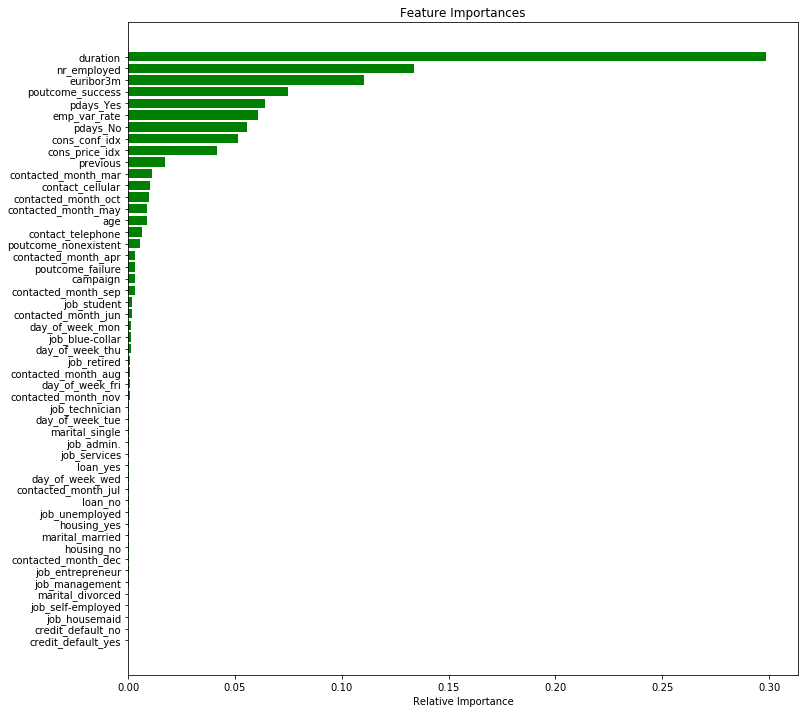

In [107]:
features = X_train_con.columns
plt.subplots(figsize = (12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
plt.xlabel('Relative Importance')

### AdaBoost

In [108]:
#Fitting training datain AdaBoost
ABModel = AdaBoostClassifier(n_estimators=600, learning_rate=.4)
ABModel.fit(X_train_con, y_train)

AdaBoostClassifier(learning_rate=0.4, n_estimators=600)

In [109]:
#Predicting y variable in train & test data
y_pred_train = ABModel.predict(X_train_con)
y_pred_test = ABModel.predict(X_test_con)

In [110]:
#print accuracy score
print('Accuracy Score:', accuracy_score(y_train, y_pred_train))
print('Accuracy Score:', accuracy_score(y_test, y_pred_test))

Accuracy Score: 0.9117767900496769
Accuracy Score: 0.9159912854030501


In [111]:
classification_report_train_test(y_train, y_pred_train, y_test, y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

          no     0.9289    0.9753    0.9516     23792
         yes     0.6726    0.4046    0.5052      2981

    accuracy                         0.9118     26773
   macro avg     0.8008    0.6899    0.7284     26773
weighted avg     0.9004    0.9118    0.9019     26773


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

          no     0.9330    0.9755    0.9538     10198
         yes     0.6925    0.4409    0.5388      1277

    accuracy                         0.9160     11475
   macro avg     0.8128    0.7082    0.7463     11475
weighted avg     0.9063    0.9160    0.9076     11475



In [112]:
scores = get_metrics(y_train, y_pred_train, y_test, y_pred_test, 'Ada Boost', scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic Regression,0.911142,0.911142,0.900074,0.902145,0.912767,0.912767,0.902416,0.904449
1,DecisionTrees,0.882830,0.882830,0.940314,0.898549,0.852113,0.852113,0.916849,0.872250
2,Random Forest,0.903373,0.903373,0.891671,0.876369,0.902919,0.902919,0.888961,0.877149
3,RandomForest BestParameters,0.929369,0.929369,0.925407,0.918841,0.914684,0.914684,0.904165,0.901128
4,Ada Boost,0.911777,0.911777,0.900403,0.901874,0.915991,0.915991,0.906265,0.907600


In [113]:
param_grid = {'n_estimators':[400,500,600],
             'learning_rate': [.2,.3,.4]}
ABModel1_CV_grid = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=4)), param_grid, n_jobs=-1)

In [114]:
ABModel1_CV_grid

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.3, 0.4],
                         'n_estimators': [400, 500, 600]})

In [115]:
%time ABModel1_CV_grid.fit(X_train_con, y_train)

Wall time: 15min 58s


GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.3, 0.4],
                         'n_estimators': [400, 500, 600]})

In [116]:
Best_ABModel = ABModel1_CV_grid.best_estimator_
print(ABModel1_CV_grid.best_score_, ABModel1_CV_grid.best_params_)

0.9056887055656532 {'learning_rate': 0.2, 'n_estimators': 400}


In [1]:
Best_ABModel

NameError: name 'Best_ABModel' is not defined

In [118]:
y_pred_train = Best_ABModel.predict(X_train_con)
y_pred_test = Best_ABModel.predict(X_test_con)

print('Accuracy Score:', accuracy_score(y_train, y_pred_train))
print('Accuracy Score:', accuracy_score(y_test, y_pred_test))

Accuracy Score: 0.9769917454151571
Accuracy Score: 0.908235294117647


In [119]:
classification_report_train_test(y_train, y_pred_train, y_test, y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

          no     0.9801    0.9943    0.9871     23792
         yes     0.9484    0.8390    0.8904      2981

    accuracy                         0.9770     26773
   macro avg     0.9643    0.9166    0.9387     26773
weighted avg     0.9766    0.9770    0.9764     26773


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

          no     0.9379    0.9603    0.9490     10198
         yes     0.6083    0.4926    0.5444      1277

    accuracy                         0.9082     11475
   macro avg     0.7731    0.7264    0.7467     11475
weighted avg     0.9013    0.9082    0.9040     11475



In [120]:
scores = get_metrics(y_train, y_pred_train, y_test, y_pred_test, 'AdaBoost Best Parameters', scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic Regression,0.911142,0.911142,0.900074,0.902145,0.912767,0.912767,0.902416,0.904449
1,DecisionTrees,0.882830,0.882830,0.940314,0.898549,0.852113,0.852113,0.916849,0.872250
2,Random Forest,0.903373,0.903373,0.891671,0.876369,0.902919,0.902919,0.888961,0.877149
3,RandomForest BestParameters,0.929369,0.929369,0.925407,0.918841,0.914684,0.914684,0.904165,0.901128
4,Ada Boost,0.911777,0.911777,0.900403,0.901874,0.915991,0.915991,0.906265,0.907600
5,AdaBoost Best Parameters,0.976992,0.976992,0.976585,0.976370,0.908235,0.908235,0.901255,0.903951


### Gradient Boosting Classifier 

In [121]:
GBModel = GradientBoostingClassifier(n_estimators=50,learning_rate=.3,subsample=.8)

In [122]:
%time GBModel.fit(X_train_con, y_train)

Wall time: 2.37 s


GradientBoostingClassifier(learning_rate=0.3, n_estimators=50, subsample=0.8)

In [123]:
y_pred_train = GBModel.predict(X_train_con)
y_pred_test = GBModel.predict(X_test_con)

In [124]:
print('Train Accuracy', accuracy_score(y_train, y_pred_train))
print('Test Accuracy', accuracy_score(y_test, y_pred_test))

Train Accuracy 0.9266425129794943
Test Accuracy 0.9187799564270153


In [125]:
classification_report_train_test(y_train, y_pred_train, y_test, y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

          no     0.9486    0.9700    0.9592     23792
         yes     0.7081    0.5803    0.6379      2981

    accuracy                         0.9266     26773
   macro avg     0.8284    0.7752    0.7985     26773
weighted avg     0.9218    0.9266    0.9234     26773


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

          no     0.9437    0.9663    0.9548     10198
         yes     0.6670    0.5395    0.5965      1277

    accuracy                         0.9188     11475
   macro avg     0.8053    0.7529    0.7757     11475
weighted avg     0.9129    0.9188    0.9150     11475



In [126]:
scores = get_metrics(y_train, y_pred_train, y_test, y_pred_test, 'Gradient Boosting', scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic Regression,0.911142,0.911142,0.900074,0.902145,0.912767,0.912767,0.902416,0.904449
1,DecisionTrees,0.882830,0.882830,0.940314,0.898549,0.852113,0.852113,0.916849,0.872250
2,Random Forest,0.903373,0.903373,0.891671,0.876369,0.902919,0.902919,0.888961,0.877149
3,RandomForest BestParameters,0.929369,0.929369,0.925407,0.918841,0.914684,0.914684,0.904165,0.901128
4,Ada Boost,0.911777,0.911777,0.900403,0.901874,0.915991,0.915991,0.906265,0.907600
5,AdaBoost Best Parameters,0.976992,0.976992,0.976585,0.976370,0.908235,0.908235,0.901255,0.903951
6,Gradient Boosting,0.926643,0.926643,0.921811,0.923414,0.918780,0.918780,0.912896,0.914970


In [130]:
#Model in use
GBM = GradientBoostingClassifier()
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [50,100,150],
           "max_depth" : [5, 10],
           "learning_rate" : [0.1,0.2,0.3]}
GBM_CV = GridSearchCV(estimator=GBM,param_grid=param_grid,cv=5)

In [131]:
%time GBM_CV.fit(X_train_con, y_train)

Wall time: 19min 52s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [5, 10],
                         'n_estimators': [50, 100, 150]})

In [133]:
bestGBMModel = GBM_CV.best_estimator_
print(GBM_CV.best_score_, GBM_CV.best_params_)
bestGBMModel

0.9158853699617066 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}


GradientBoostingClassifier(max_depth=5, n_estimators=50)

In [135]:
y_pred_train = bestGBMModel.predict(X_train_con)
y_pred_test = bestGBMModel.predict(X_test_con)

print('Train Accuracy:', accuracy_score(y_train, y_pred_train))
print('Test Accuracy:', accuracy_score(y_test, y_pred_test))

Train Accuracy: 0.9313113958092107
Test Accuracy: 0.9204357298474946


In [138]:
classification_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

          no     0.9524    0.9713    0.9617     23792
         yes     0.7277    0.6122    0.6650      2981

    accuracy                         0.9313     26773
   macro avg     0.8400    0.7918    0.8133     26773
weighted avg     0.9273    0.9313    0.9287     26773


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

          no     0.9455    0.9662    0.9557     10198
         yes     0.6727    0.5552    0.6083      1277

    accuracy                         0.9204     11475
   macro avg     0.8091    0.7607    0.7820     11475
weighted avg     0.9151    0.9204    0.9171     11475



In [139]:
print(confusion_matrix(y_test, y_pred_test))

[[9853  345]
 [ 568  709]]


In [140]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"GBM_BestParameters",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic Regression,0.911142,0.911142,0.900074,0.902145,0.912767,0.912767,0.902416,0.904449
1,DecisionTrees,0.882830,0.882830,0.940314,0.898549,0.852113,0.852113,0.916849,0.872250
2,Random Forest,0.903373,0.903373,0.891671,0.876369,0.902919,0.902919,0.888961,0.877149
3,RandomForest BestParameters,0.929369,0.929369,0.925407,0.918841,0.914684,0.914684,0.904165,0.901128
4,Ada Boost,0.911777,0.911777,0.900403,0.901874,0.915991,0.915991,0.906265,0.907600
5,AdaBoost Best Parameters,0.976992,0.976992,0.976585,0.976370,0.908235,0.908235,0.901255,0.903951
6,Gradient Boosting,0.926643,0.926643,0.921811,0.923414,0.918780,0.918780,0.912896,0.914970
7,GBM_BestParameters,0.931311,0.931311,0.927342,0.928690,0.920436,0.920436,0.915134,0.917060


In [141]:
#Extracting important features
bestGBMModel.feature_importances_

array([1.90077437e-02, 4.72028341e-01, 7.98904921e-03, 4.03255475e-03,
       1.83094094e-03, 2.11714731e-02, 3.21127139e-02, 9.40644143e-02,
       2.55841716e-01, 7.14767350e-04, 6.80393419e-04, 2.32462088e-04,
       3.48178469e-04, 9.04623663e-04, 5.51730332e-04, 5.88828258e-04,
       3.77458090e-04, 4.08659391e-04, 1.98142244e-03, 6.43764885e-04,
       5.13442102e-04, 1.45633949e-04, 1.57941327e-03, 0.00000000e+00,
       0.00000000e+00, 4.28050570e-04, 2.61275239e-04, 1.17288064e-04,
       3.24721063e-04, 2.97670842e-03, 2.09814585e-03, 1.64015096e-03,
       4.45883171e-07, 2.72884264e-04, 9.85119471e-04, 5.12463252e-04,
       9.14128833e-04, 7.47699727e-04, 1.96676158e-04, 1.30213675e-02,
       5.36386468e-04, 8.10335674e-04, 2.71854839e-03, 1.50633358e-03,
       3.04313376e-03, 3.15779998e-03, 7.32356893e-03, 1.34674976e-02,
       4.44740829e-03, 2.45325857e-04, 2.04968116e-02])

In [143]:
importancesGB = bestGBMModel.feature_importances_
indices = np.argsort(importancesGB)
print(indices)

[24 23 32 27 21 38 11 49 26 33 28 12 16 17 25 35 20 40 14 15 19 10  9 37
 41 13 36 34 43 22 31  4 18 30 42 29 44 45  3 48 46  2 39 47  0 50  5  6
  7  8  1]


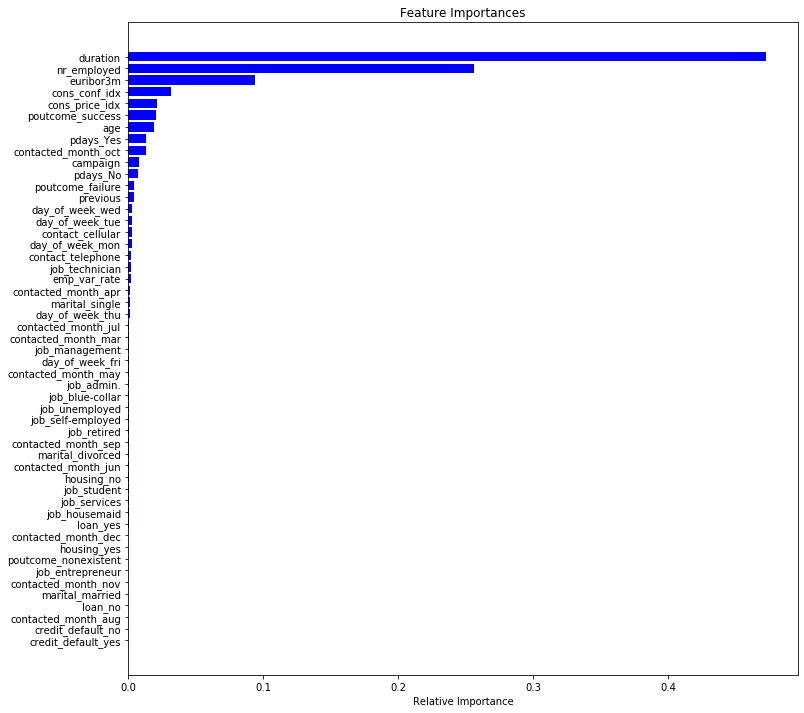

In [144]:
%matplotlib inline
features = X_train_con.columns
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importancesGB[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
plt.xlabel('Relative Importance')

plt.show()

In [147]:
indices = np.argsort(importancesGB)[::-1]
indices

array([ 1,  8,  7,  6,  5, 50,  0, 47, 39,  2, 46, 48,  3, 45, 44, 29, 42,
       30, 18,  4, 31, 22, 43, 34, 36, 13, 41, 37,  9, 10, 19, 15, 14, 40,
       20, 35, 25, 17, 16, 12, 28, 33, 26, 49, 11, 38, 21, 27, 32, 23, 24],
      dtype=int64)

In [165]:
pd.DataFrame([X_train_con.columns[indices], np.sort(importancesGB)[::-1]])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,duration,nr_employed,euribor3m,cons_conf_idx,cons_price_idx,poutcome_success,age,pdays_Yes,contacted_month_oct,campaign,pdays_No,poutcome_failure,previous,day_of_week_wed,day_of_week_tue,contact_cellular,day_of_week_mon,contact_telephone,job_technician,emp_var_rate,contacted_month_apr,marital_single,day_of_week_thu,contacted_month_jul,contacted_month_mar,job_management,day_of_week_fri,contacted_month_may,job_admin.,job_blue-collar,job_unemployed,job_self-employed,job_retired,contacted_month_sep,marital_divorced,contacted_month_jun,housing_no,job_student,job_services,job_housemaid,loan_yes,contacted_month_dec,housing_yes,poutcome_nonexistent,job_entrepreneur,contacted_month_nov,marital_married,loan_no,contacted_month_aug,credit_default_no,credit_default_yes
1,0.472028,0.255842,0.0940644,0.0321127,0.0211715,0.0204968,0.0190077,0.0134675,0.0130214,0.00798905,0.00732357,0.00444741,0.00403255,0.0031578,0.00304313,0.00297671,0.00271855,0.00209815,0.00198142,0.00183094,0.00164015,0.00157941,0.00150633,0.000985119,0.000914129,0.000904624,0.000810336,0.0007477,0.000714767,0.000680393,0.000643765,0.000588828,0.00055173,0.000536386,0.000513442,0.000512463,0.000428051,0.000408659,0.000377458,0.000348178,0.000324721,0.000272884,0.000261275,0.000245326,0.000232462,0.000196676,0.000145634,0.000117288,4.45883e-07,0,0


### XGBoost 

In [167]:
XGBModel = XGBClassifier(n_estimators = 400, gamma=.5, learning_rate = .1)
%time XGBModel.fit(X_train_con, y_train)

[00:02:07] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 9.31 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [168]:
y_pred_train = XGBModel.predict(X_train_con)
y_pred_test = XGBModel.predict(X_test_con)

print('Train Accuracy Score:', accuracy_score(y_train, y_pred_train))
print('TestAccuracy Score:', accuracy_score(y_test, y_pred_test))

Train Accuracy Score: 0.9634333096776603
TestAccuracy Score: 0.9172984749455337


In [169]:
classification_report_train_test(y_train, y_pred_train, y_test, y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

          no     0.9705    0.9889    0.9796     23792
         yes     0.8960    0.7598    0.8223      2981

    accuracy                         0.9634     26773
   macro avg     0.9332    0.8744    0.9010     26773
weighted avg     0.9622    0.9634    0.9621     26773


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

          no     0.9438    0.9644    0.9540     10198
         yes     0.6556    0.5411    0.5929      1277

    accuracy                         0.9173     11475
   macro avg     0.7997    0.7528    0.7734     11475
weighted avg     0.9117    0.9173    0.9138     11475



In [170]:
scores = get_metrics(y_train, y_pred_train, y_test, y_pred_test, 'XGBoosting', scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic Regression,0.911142,0.911142,0.900074,0.902145,0.912767,0.912767,0.902416,0.904449
1,DecisionTrees,0.882830,0.882830,0.940314,0.898549,0.852113,0.852113,0.916849,0.872250
2,Random Forest,0.903373,0.903373,0.891671,0.876369,0.902919,0.902919,0.888961,0.877149
3,RandomForest BestParameters,0.929369,0.929369,0.925407,0.918841,0.914684,0.914684,0.904165,0.901128
4,Ada Boost,0.911777,0.911777,0.900403,0.901874,0.915991,0.915991,0.906265,0.907600
5,AdaBoost Best Parameters,0.976992,0.976992,0.976585,0.976370,0.908235,0.908235,0.901255,0.903951
6,Gradient Boosting,0.926643,0.926643,0.921811,0.923414,0.918780,0.918780,0.912896,0.914970
7,GBM_BestParameters,0.931311,0.931311,0.927342,0.928690,0.920436,0.920436,0.915134,0.917060
8,XGBoosting,0.963433,0.963433,0.962173,0.962102,0.917298,0.917298,0.911698,0.913790


In [173]:
np.linspace(.6,.8,2)

array([0.6, 0.8])

In [176]:
XGB_Grid = XGBClassifier(n_jobs = -1)
#Using grid over parameters of interest
param_gird = {
    'columnSampleByTree' : np.linspace(.6,.8,2),
    'n_estimators' : [100,200],
    'max_depth': [5,10]
    
}
XGB_Grid_CV = GridSearchCV(estimator = XGB_Grid, param_grid = param_grid, cv = 10)
XGB_Grid_CV

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, 

In [177]:
%time XGB_Grid_CV.fit(X_train_con, y_train)

[00:15:28] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:15:30] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:15:31] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:15:32] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, 

In [178]:
bestXBGModel = XGB_Grid_CV.best_estimator_
print(XGB_Grid_CV.best_score_, XGB_Grid_CV.best_params_)

0.917939655790496 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [179]:
bestXBGModel

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [180]:
y_pred_train = bestXBGModel.predict(X_train_con)
y_pred_test = bestXBGModel.predict(X_test_con)

In [182]:
print('Train Accuracy:', accuracy_score(y_train, y_pred_train))
print('Test Accuracy:', accuracy_score(y_test, y_pred_test))

Train Accuracy: 0.9321704702498786
Test Accuracy: 0.9183442265795208


In [183]:
classification_report_train_test(y_train, y_pred_train, y_test, y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

          no     0.9510    0.9738    0.9623     23792
         yes     0.7416    0.5998    0.6632      2981

    accuracy                         0.9322     26773
   macro avg     0.8463    0.7868    0.8127     26773
weighted avg     0.9277    0.9322    0.9290     26773


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

          no     0.9423    0.9673    0.9547     10198
         yes     0.6690    0.5270    0.5896      1277

    accuracy                         0.9183     11475
   macro avg     0.8056    0.7472    0.7721     11475
weighted avg     0.9119    0.9183    0.9140     11475



In [184]:
print(confusion_matrix(y_test, y_pred_test))

[[9865  333]
 [ 604  673]]


In [185]:
scores = get_metrics(y_train, y_pred_train, y_test, y_pred_test, 'XGB_Best Parameters', scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic Regression,0.911142,0.911142,0.900074,0.902145,0.912767,0.912767,0.902416,0.904449
1,DecisionTrees,0.882830,0.882830,0.940314,0.898549,0.852113,0.852113,0.916849,0.872250
2,Random Forest,0.903373,0.903373,0.891671,0.876369,0.902919,0.902919,0.888961,0.877149
3,RandomForest BestParameters,0.929369,0.929369,0.925407,0.918841,0.914684,0.914684,0.904165,0.901128
4,Ada Boost,0.911777,0.911777,0.900403,0.901874,0.915991,0.915991,0.906265,0.907600
5,AdaBoost Best Parameters,0.976992,0.976992,0.976585,0.976370,0.908235,0.908235,0.901255,0.903951
6,Gradient Boosting,0.926643,0.926643,0.921811,0.923414,0.918780,0.918780,0.912896,0.914970
7,GBM_BestParameters,0.931311,0.931311,0.927342,0.928690,0.920436,0.920436,0.915134,0.917060
8,XGBoosting,0.963433,0.963433,0.962173,0.962102,0.917298,0.917298,0.911698,0.913790
9,XGB_Best Parameters,0.932170,0.932170,0.927712,0.928987,0.918344,0.918344,0.911889,0.914033


In [186]:
#Extracting important features
bestXBGModel.feature_importances_

array([0.00739505, 0.06431875, 0.00612957, 0.01035724, 0.02190621,
       0.0193836 , 0.04281915, 0.02319656, 0.49788404, 0.00551955,
       0.01898888, 0.00147293, 0.00104591, 0.00489323, 0.00766115,
       0.00591222, 0.00545871, 0.00259528, 0.00629009, 0.00542697,
       0.0061724 , 0.0055262 , 0.00959792, 0.        , 0.        ,
       0.00473483, 0.        , 0.00445752, 0.        , 0.01216356,
       0.        , 0.0120113 , 0.0049457 , 0.        , 0.00690522,
       0.00508232, 0.00985073, 0.02403338, 0.00673884, 0.02014697,
       0.0108119 , 0.00544134, 0.00808385, 0.00709646, 0.00710707,
       0.00830495, 0.02800984, 0.        , 0.01147788, 0.        ,
       0.02264475], dtype=float32)

In [187]:
importancesXGB = bestXBGModel.feature_importances_
indices = np.argsort(importancesXGB)
print(indices)

[28 47 26 49 24 23 30 33 12 11 17 27 25 13 32 35 19 41 16  9 21 15  2 20
 18 38 34 43 44  0 14 42 45 22 36  3 40 48 31 29 10  5 39  4 50  7 37 46
  6  1  8]


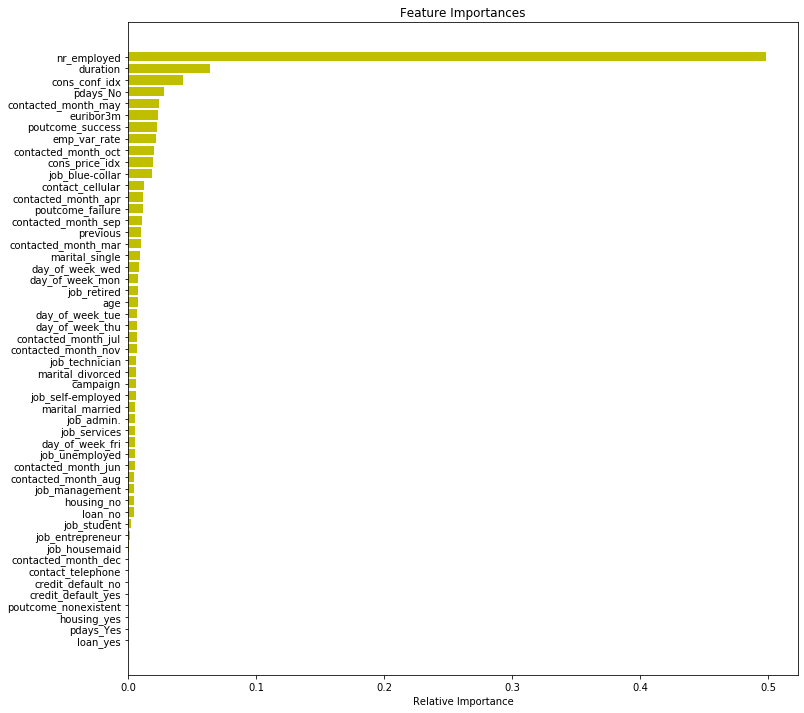

In [191]:
%matplotlib inline
features = X_train_con.columns
plt.subplots(figsize = (12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importancesXGB[indices], color='y', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
plt.xlabel('Relative Importance')

plt.show()

In [194]:
indices = np.argsort(importancesXGB)[::-1]
indices
pd.DataFrame([X_train_con.columns[indices], np.sort(importancesXGB)[::-1]])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,nr_employed,duration,cons_conf_idx,pdays_No,contacted_month_may,euribor3m,poutcome_success,emp_var_rate,contacted_month_oct,cons_price_idx,job_blue-collar,contact_cellular,contacted_month_apr,poutcome_failure,contacted_month_sep,previous,contacted_month_mar,marital_single,day_of_week_wed,day_of_week_mon,job_retired,age,day_of_week_tue,day_of_week_thu,contacted_month_jul,contacted_month_nov,job_technician,marital_divorced,campaign,job_self-employed,marital_married,job_admin.,job_services,day_of_week_fri,job_unemployed,contacted_month_jun,contacted_month_aug,job_management,housing_no,loan_no,job_student,job_entrepreneur,job_housemaid,contacted_month_dec,contact_telephone,credit_default_no,credit_default_yes,poutcome_nonexistent,housing_yes,pdays_Yes,loan_yes
1,0.497884,0.0643187,0.0428191,0.0280098,0.0240334,0.0231966,0.0226447,0.0219062,0.020147,0.0193836,0.0189889,0.0121636,0.0120113,0.0114779,0.0108119,0.0103572,0.00985073,0.00959792,0.00830495,0.00808385,0.00766115,0.00739505,0.00710707,0.00709646,0.00690522,0.00673884,0.00629009,0.0061724,0.00612957,0.00591222,0.0055262,0.00551955,0.00545871,0.00544134,0.00542697,0.00508232,0.0049457,0.00489323,0.00473483,0.00445752,0.00259528,0.00147293,0.00104591,0,0,0,0,0,0,0,0


### Stacking

In [197]:
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [198]:
y_train.head()

27416    no
22092    no
11221    no
24493    no
11957    no
Name: y, dtype: category
Categories (2, object): ['no', 'yes']

In [199]:
y_train1 = le.transform(y_train)

In [200]:
y_train1

array([0, 0, 0, ..., 0, 0, 0])

In [201]:
y_test.head()

33558    no
32630    no
17726    no
5336     no
18085    no
Name: y, dtype: category
Categories (2, object): ['no', 'yes']

In [202]:
y_test1 = le.transform(y_test)

In [203]:
y_test1

array([0, 0, 0, ..., 1, 0, 0])

In [204]:
StackModels = [DTModel, RFModel, RFModel_CV_grid, ABModel, ABModel1_CV_grid, GBModel, GBM_CV, XGBModel, XGB_Grid_CV]

In [205]:
Stack_train, Stack_test = stacking(StackModels,X_train_con, y_train1, X_test_con, regression = False, 
                                  needs_proba = False, save_dir = None, metric = accuracy_score, n_folds = 4,
                                  stratified = True, shuffle = True, random_state = 0, verbose = 2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [9]

model  0:     [DecisionTreeClassifier]
    fold  0:  [0.87003287]
    fold  1:  [0.86134768]
    fold  2:  [0.84849843]
    fold  3:  [0.86179591]
    ----
    MEAN:     [0.86041872] + [0.00770202]
    FULL:     [0.86041908]

model  1:     [RandomForestClassifier]
    fold  0:  [0.90215118]
    fold  1:  [0.90303302]
    fold  2:  [0.89929777]
    fold  3:  [0.90363066]
    ----
    MEAN:     [0.90202816] + [0.00166192]
    FULL:     [0.90202816]

model  2:     [GridSearchCV]
    fold  0:  [0.90962056]
    fold  1:  [0.90990587]
    fold  2:  [0.90811295]
    fold  3:  [0.91154938]
    ----
    MEAN:     [0.90979719] + [0.00121961]
    FULL:     [0.90979718]

model  3:     [AdaBoostClassifier]
    fold  0:  [0.91126382]
    fold  1:  [0.90736590]
    fold  2:  [0.90646945]
    fold  3:  [0.91274466]
    ----
    MEAN:     [0.90946096] + [0.00261588]
    FULL: 

In [206]:
model = GradientBoostingClassifier(random_state=0, n_estimators=100, max_depth=3)
model.fit(Stack_train, y_train1)

GradientBoostingClassifier(random_state=0)

In [207]:
y_pred_train = model.predict(Stack_train)
y_pred_test = model.predict(Stack_test)

In [208]:
print('Train Accuracy:', accuracy_score(y_train1, y_pred_train))
print('Test Accuracy:', accuracy_score(y_test1, y_pred_test))

Train Accuracy: 0.9181638217607291
Test Accuracy: 0.9195642701525054


In [209]:
scores = get_metrics(y_train1, y_pred_train, y_test1, y_pred_test, 'Stacked Models', scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic Regression,0.911142,0.911142,0.900074,0.902145,0.912767,0.912767,0.902416,0.904449
1,DecisionTrees,0.882830,0.882830,0.940314,0.898549,0.852113,0.852113,0.916849,0.872250
2,Random Forest,0.903373,0.903373,0.891671,0.876369,0.902919,0.902919,0.888961,0.877149
3,RandomForest BestParameters,0.929369,0.929369,0.925407,0.918841,0.914684,0.914684,0.904165,0.901128
4,Ada Boost,0.911777,0.911777,0.900403,0.901874,0.915991,0.915991,0.906265,0.907600
5,AdaBoost Best Parameters,0.976992,0.976992,0.976585,0.976370,0.908235,0.908235,0.901255,0.903951
6,Gradient Boosting,0.926643,0.926643,0.921811,0.923414,0.918780,0.918780,0.912896,0.914970
7,GBM_BestParameters,0.931311,0.931311,0.927342,0.928690,0.920436,0.920436,0.915134,0.917060
8,XGBoosting,0.963433,0.963433,0.962173,0.962102,0.917298,0.917298,0.911698,0.913790
9,XGB_Best Parameters,0.932170,0.932170,0.927712,0.928987,0.918344,0.918344,0.911889,0.914033


### The current model will now be applied on production data.

In [239]:
prod = pd.read_csv('prod_cases.csv', na_values='unknown')
prod.head(5)

,customer_no,age,job,marital,education,credit_default,housing,loan,contact,contacted_month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,15725,36,technician,married,basic.4y,no,no,no,cellular,jul,mon,854,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,yes
1,28030,39,services,married,high.school,no,no,no,cellular,apr,thu,598,2,999,2,failure,-1.8,93.075,-47.1,1.483,5099.1,no
2,17730,54,management,married,university.degree,no,no,yes,cellular,jul,tue,218,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
3,15377,43,blue-collar,married,basic.9y,no,yes,no,cellular,jul,fri,226,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no
4,7763,26,management,single,university.degree,no,no,no,telephone,jun,mon,72,3,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no


In [212]:
data.columns

Index(['age', 'job', 'marital', 'education', 'credit_default', 'housing',
       'loan', 'contact', 'contacted_month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [213]:
prod.columns
#There are no new or missing columns in prod data.

Index(['customer_no', 'age', 'job', 'marital', 'education', 'credit_default',
       'housing', 'loan', 'contact', 'contacted_month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

### Exploratory Data Analysis of Prod data.


In [214]:
prod.shape
#Almost 10% of Train data is given to us to apply the model

(4119, 22)

In [240]:
prod.describe(include = 'all')
#There seems to be an outlier for duration with max value being 2870 which far above Q3. The min value of 0 is farless than Q2.
#The min could be an NaN. Let's explore it further. But first drop customer id column.

,customer_no,age,job,marital,education,credit_default,housing,loan,contact,contacted_month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,4119.000000,4119.000000,4091,4109,3955,3287,4023,4023,4119,4119,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119
unique,NaN,NaN,11,3,7,1,2,2,3,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,admin.,married,university.degree,no,yes,no,cellular,may,mon,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,NaN,1041,2512,1246,3287,2120,3411,2562,1376,863,NaN,NaN,NaN,NaN,3575,NaN,NaN,NaN,NaN,NaN,3657
mean,20229.033018,39.965283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,251.666181,2.549648,964.751882,0.171401,NaN,0.105293,93.590579,-40.452561,3.649123,5167.829862,NaN
std,11948.241346,10.218782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.099012,2.760806,181.270248,0.503265,NaN,1.576299,0.579783,4.597445,1.728729,71.873017,NaN
min,13.000000,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,9863.000000,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.354000,5099.100000,NaN
50%,19994.000000,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.918000,-41.800000,4.857000,5191.000000,NaN
75%,30521.500000,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [241]:
#Dropping customer ID column
prod.drop(['customer_no'], axis=1, inplace = True)

In [217]:
prod.columns

Index(['age', 'job', 'marital', 'education', 'credit_default', 'housing',
       'loan', 'contact', 'contacted_month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [219]:
#Let's check the unique values and counts on each variable
dataFunc(prod)
#For duration there seem to be some outliers which are far above the Q3 value which should be addressed.

 age  : int64
69
31    197
32    196
34    179
33    176
36    172
     ... 
86      1
84      1
88      1
79      1
91      1
Name: age, Length: 69, dtype: int64
______________________
 job  : object
11
admin.           1041
blue-collar       914
technician        670
services          389
management        307
entrepreneur      167
retired           164
self-employed     146
housemaid         115
unemployed         91
student            87
Name: job, dtype: int64
______________________
 marital  : object
3
married     2512
single      1128
divorced     469
Name: marital, dtype: int64
______________________
 education  : object
7
university.degree      1246
high.school             948
basic.9y                594
professional.course     521
basic.4y                386
basic.6y                259
illiterate                1
Name: education, dtype: int64
______________________
 credit_default  : object
1
no    3287
Name: credit_default, dtype: int64
______________________
 housing  : obj

In [346]:
#contact has a new value (email).Since, I did not call out handle_unknowns = ignore for OHE in Train/Test modeling, this new value
#will return errors during onehotencoding. Hence, updating emails to Cellular.
#prod[prod.contact=='Email'].iloc[:,7].update('cellular')
prod.contact = np.where(prod.contact == 'Email', 'cellular', prod.contact)
#prod[prod.contact=='Email']
prod.contact.value_counts()

cellular     2401
telephone    1438
Name: contact, dtype: int64

In [359]:
prod.contact.astype('category')

0        cellular
1        cellular
2        cellular
3        cellular
4       telephone
          ...    
4114     cellular
4115    telephone
4116    telephone
4117    telephone
4118     cellular
Name: contact, Length: 3839, dtype: category
Categories (2, object): ['cellular', 'telephone']

In [224]:
prod[prod.duration == 854]

,age,job,marital,education,credit_default,housing,loan,contact,contacted_month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,36,technician,married,basic.4y,no,no,no,cellular,jul,mon,854,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,yes
941,33,blue-collar,single,basic.6y,no,no,no,cellular,jul,thu,854,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes


In [232]:
# for i in ('duration'):
#     Q3 = np.round(np.quantile(prod[i],.75),2)
#     print(Q3)
#     Q1 = np.round(np.quantile(prod[i],.25),2)
#     print(Q1)
#     IQR = np.round(Q3-Q1,2)
#     print(IQR)
#     lWhisker = np.round(Q1-IQR*1.5,2)
#     print(lWhisker)
#     uWhisker = np.round(Q3+IQR*1.5,2)
#     print(uWhisker)
#     prod[i].clip(lWhisker, uWhisker, inplace=True)
#     print('\n')

In [234]:
# prod.duration
Q3 = np.round(np.quantile(prod.duration,.75),2)
Q1 = np.round(np.quantile(prod.duration,.25),2)
IQR = Q3-Q1
upWhisker = np.round(Q3+IQR*1.5,2)
print(Q3,'\n', Q1, '\n', IQR, '\n', upWhisker)

311.0 
 101.0 
 210.0 
 626.0


In [245]:
prod.duration[prod.duration > upWhisker].value_counts()

738     4
765     4
705     3
771     3
698     3
       ..
769     1
767     1
736     1
1224    1
763     1
Name: duration, Length: 233, dtype: int64

In [246]:
#prod.duration = [upWhisker for i in prod.duration if prod.duration[i] > upWhisker]
prod.duration = np.where(prod.duration > upWhisker, upWhisker, prod.duration)
#Since the forloop was not working, I defined upWhisker and used where() to replace all duration values that are > upWhisker

In [250]:
prod[prod.duration>upWhisker].shape[0]
#no rows higher than upWhisker

0

In [251]:
prod.describe(include = 'all')

,age,job,marital,education,credit_default,housing,loan,contact,contacted_month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,4119.000000,4091,4109,3955,3287,4023,4023,4119,4119,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119
unique,NaN,11,3,7,1,2,2,3,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,mon,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,1041,2512,1246,3287,2120,3411,2562,1376,863,NaN,NaN,NaN,NaN,3575,NaN,NaN,NaN,NaN,NaN,3657
mean,39.965283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.814033,2.549648,964.751882,0.171401,NaN,0.105293,93.590579,-40.452561,3.649123,5167.829862,NaN
std,10.218782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171.893388,2.760806,181.270248,0.503265,NaN,1.576299,0.579783,4.597445,1.728729,71.873017,NaN
min,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.354000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.918000,-41.800000,4.857000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [252]:
prod.dtypes

age                  int64
job                 object
marital             object
education           object
credit_default      object
housing             object
loan                object
contact             object
contacted_month     object
day_of_week         object
duration           float64
campaign             int64
pdays                int64
previous             int64
poutcome            object
emp_var_rate       float64
cons_price_idx     float64
cons_conf_idx      float64
euribor3m          float64
nr_employed        float64
y                   object
dtype: object

In [361]:
catCols(prod)

age                   int64
job                category
marital            category
education          category
credit_default     category
housing            category
loan               category
contact            category
contacted_month    category
day_of_week        category
duration            float64
campaign              int64
pdays              category
previous              int64
poutcome           category
emp_var_rate        float64
cons_price_idx      float64
cons_conf_idx       float64
euribor3m           float64
nr_employed         float64
y                  category
dtype: object


In [256]:
#Handling education
prod.education.unique()
prod.education = np.where(prod.education == 'basic.4y', 'Basic', prod.education)
prod.education = np.where(prod.education == 'basic.6y', 'Basic', prod.education)
prod.education = np.where(prod.education == 'basic.9y', 'Basic', prod.education)

In [257]:
prod.education.unique()

array(['Basic', 'high.school', 'university.degree', 'professional.course',
       nan, 'illiterate'], dtype=object)

In [303]:
prod.education.dtype
prod.education = prod.education.astype('category')

In [362]:
prod.education.dtype

CategoricalDtype(categories=['Basic', 'high.school', 'illiterate', 'professional.course',
                  'university.degree'],
                 ordered=False)

In [259]:
#Handling pdays
prod.pdays = prod.pdays.replace(999, 'No')
prod.pdays = prod.pdays.replace([6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], 'Yes')

In [260]:
print(prod.pdays.value_counts())
prod.pdays = prod.pdays.astype('category')

No     3977
Yes     142
Name: pdays, dtype: int64

In [262]:
prod.y.value_counts(normalize = True)*100

no     88.783685
yes    11.216315
Name: y, dtype: float64

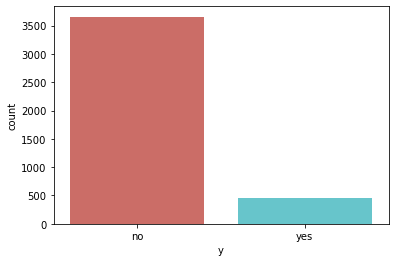

In [263]:
sns.countplot(x='y', data=prod, palette='hls')

In [264]:
prod.groupby('y').mean()
#The average call duration is more than double for yay sayers vs nay sayers.
#The average campaign time is lower for those who bought the term deposit

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,
no,39.859448,204.646158,2.619087,0.129888,0.270276,93.620542,-40.522313,3.833862,5176.618512
yes,40.803030,429.032468,2.000000,0.500000,-1.200649,93.353407,-39.900433,2.186807,5098.262554


### Data Visualizations

Text(0, 0.5, 'Purchase Frequency')

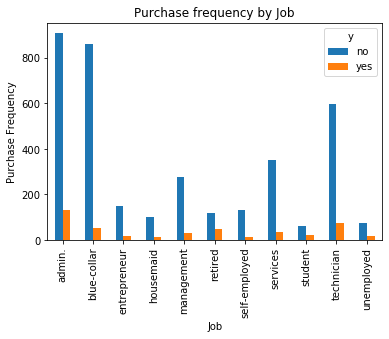

In [267]:
pd.crosstab(prod.job, prod.y).plot(kind='bar')
plt.title('Purchase frequency by Job')
plt.xlabel('Job')
plt.ylabel('Purchase Frequency')
#customers with administrative roles are more prone to subscribe

Text(0, 0.5, 'Purchase Frequency')

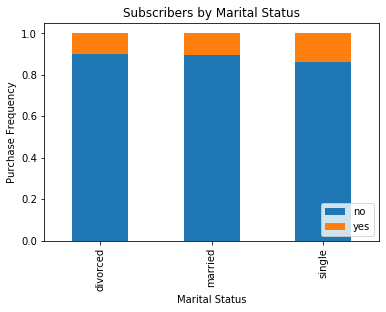

In [270]:
stackedBar = pd.crosstab(prod.marital, prod.y)
stackedBar.div(stackedBar.sum(1).astype('float'), axis=0).plot(kind='bar', stacked=True)
plt.legend(loc='lower right')
plt.title('Subscribers by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Purchase Frequency')

Text(0, 0.5, 'Education Levels')

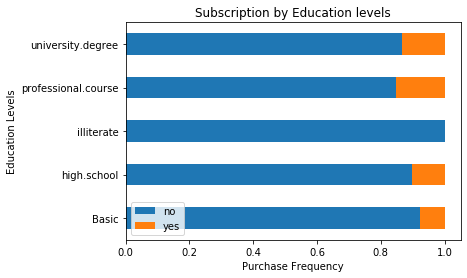

In [272]:
stackedEdu = pd.crosstab(prod.education, prod.y)
stackedEdu.div(stackedEdu.sum(1).astype('float64'), axis=0).plot(kind='barh', stacked=True)
plt.legend(loc='lower left')
plt.title('Subscription by Education levels')
plt.xlabel('Purchase Frequency')
plt.ylabel('Education Levels')

Text(0, 0.5, 'Purchase Frequency')

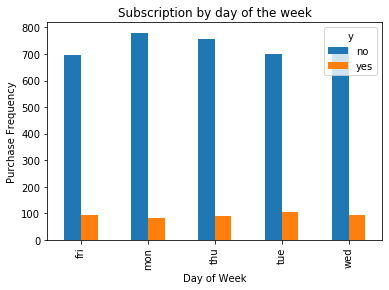

In [275]:
pd.crosstab(prod.day_of_week, prod.y).plot(kind='bar')
plt.title('Subscription by day of the week')
plt.xlabel('Day of Week')
plt.ylabel('Purchase Frequency')
#With negligable variance between the day, it is very unlikely to be a good predictor.

Text(0, 0.5, 'Purchase Frequency')

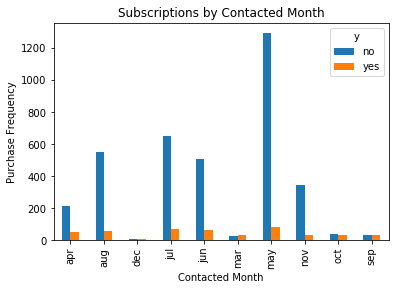

In [279]:
pd.crosstab(prod.contacted_month, prod.y).plot(kind = 'bar')
plt.title('Subscriptions by Contacted Month')
plt.xlabel('Contacted Month')
plt.ylabel('Purchase Frequency')
#With good amount of variance, Month could be an important predictor.

Text(0, 0.5, 'Purchase Frequency')

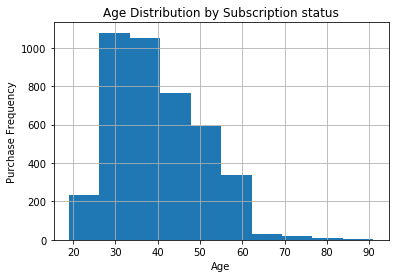

In [281]:
prod.age.hist()
plt.title('Age Distribution by Subscription status')
plt.xlabel('Age')
plt.ylabel('Frequency')
#Majority age group of customers to the bank are between 25 and 40.

In [282]:
#Missing values imputation
prod.isna().sum()

age                  0
job                 28
marital             10
education          164
credit_default     832
housing             96
loan                96
contact              0
contacted_month      0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp_var_rate         0
cons_price_idx       0
cons_conf_idx        0
euribor3m            0
nr_employed          0
y                    0
dtype: int64

In [286]:
naCols = pd.DataFrame(prod.isna().sum()).reset_index()
naCols.columns = ['Variables', 'MissingCount']
naCols[naCols.MissingCount >0].sort_values('MissingCount', ascending = False)

,Variables,MissingCount
4,credit_default,832
3,education,164
5,housing,96
6,loan,96
1,job,28
2,marital,10


In [288]:
prod.head(1)

,age,job,marital,education,credit_default,housing,loan,contact,contacted_month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,36,technician,married,Basic,no,no,no,cellular,jul,mon,626.0,1,No,0,nonexistent,1.4,93.918,-42.7,4.96,5228.1,yes


In [287]:
naCols.dtypes

Variables       object
MissingCount     int64
dtype: object

In [324]:
#Droping rows that are less than 5%
prod.dropna(subset = ['education', 'housing', 'loan', 'job', 'marital'], inplace = True)

In [294]:
prod.credit_default.mode()[0]

'no'

In [295]:
#Imputation by fillna with mode
prod.credit_default.fillna(prod.credit_default.mode()[0], inplace=True)

In [352]:
prod.credit_default.shape

(3839,)

In [325]:
prod.isna().sum()

age                0
job                0
marital            0
education          0
credit_default     0
housing            0
loan               0
contact            0
contacted_month    0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
emp_var_rate       0
cons_price_idx     0
cons_conf_idx      0
euribor3m          0
nr_employed        0
y                  0
dtype: int64

In [296]:
prod.dtypes

age                   int64
job                category
marital            category
education            object
credit_default     category
housing            category
loan               category
contact            category
contacted_month    category
day_of_week        category
duration            float64
campaign              int64
pdays              category
previous              int64
poutcome           category
emp_var_rate        float64
cons_price_idx      float64
cons_conf_idx       float64
euribor3m           float64
nr_employed         float64
y                  category
dtype: object

In [363]:
#Standardization of prod data
numVarsProd = list(prod.select_dtypes(exclude = 'category'))
print(prod[numVarsProd].shape)
prod[numVarsProd].head(1)

(3839, 9)


,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,36,626.0,1,0,1.4,93.918,-42.7,4.96,5228.1


In [364]:
prodNum = pd.DataFrame(standardizer.transform(prod[numVarsProd]), columns = prod[numVarsProd].columns)

In [365]:
prodNum.head(1)

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,-0.37539,1.422513,-0.563223,-0.352518,0.84638,0.610698,-0.46367,0.777269,0.850868


In [367]:
#One hot encoding of Prod data
catVarProd = list(prod.select_dtypes(include = 'category'))
print(catVarProd)
catVarProd.remove('education')
catVarProd.pop()
print(catVarProd)
print(prod[catVarProd].columns)
prod[catVarProd].head(1)

['job', 'marital', 'education', 'credit_default', 'housing', 'loan', 'contact', 'contacted_month', 'day_of_week', 'pdays', 'poutcome', 'y']
['job', 'marital', 'credit_default', 'housing', 'loan', 'contact', 'contacted_month', 'day_of_week', 'pdays', 'poutcome']
Index(['job', 'marital', 'credit_default', 'housing', 'loan', 'contact',
       'contacted_month', 'day_of_week', 'pdays', 'poutcome'],
      dtype='object')


,job,marital,credit_default,housing,loan,contact,contacted_month,day_of_week,pdays,poutcome
0,technician,married,no,no,no,cellular,jul,mon,No,nonexistent


In [368]:
prodCat = OHE.transform(prod[catVarProd])
prodCat = pd.DataFrame(prodCat.todense(), columns = columns_ohe)

In [369]:
prodCat.head(1)

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,credit_default_no,credit_default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contacted_month_apr,contacted_month_aug,contacted_month_dec,contacted_month_jul,contacted_month_jun,contacted_month_mar,contacted_month_may,contacted_month_nov,contacted_month_oct,contacted_month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_No,pdays_Yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [370]:
print(prod.shape)
print(prodCat.shape)
print(prodNum.shape)

(3839, 21)
(3839, 42)
(3839, 9)


In [371]:
prodCon = pd.concat([prodNum, prodCat], axis=1)

In [372]:
prodCon.head(1)

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,credit_default_no,credit_default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contacted_month_apr,contacted_month_aug,contacted_month_dec,contacted_month_jul,contacted_month_jun,contacted_month_mar,contacted_month_may,contacted_month_nov,contacted_month_oct,contacted_month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_No,pdays_Yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,-0.37539,1.422513,-0.563223,-0.352518,0.84638,0.610698,-0.46367,0.777269,0.850868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [373]:
prodCon.shape

(3839, 51)

In [377]:
y_prod = prod.y
y_prod.shape

(3839,)

In [388]:
totalScores = pd.DataFrame(columns=['Model','Prod_Accuracy', 'Prod_Recall', 'Prod_Precision', 'Prod_F1_Score'])
totalScores

,Model,Prod_Accuracy,Prod_Recall,Prod_Precision,Prod_F1_Score


In [375]:
# def get_metricsProd(train_actual,train_predicted,test_actual,test_predicted,prodActual,prodPredicted,model_description,dataframe):
#     train_accuracy = accuracy_score(train_actual,train_predicted)
#     train_recall   = recall_score(train_actual,train_predicted,average="weighted")
#     train_precision= precision_score(train_actual,train_predicted,average="weighted")
#     train_f1score  = f1_score(train_actual,train_predicted,average="weighted")
#     test_accuracy = accuracy_score(test_actual,test_predicted)
#     test_recall   = recall_score(test_actual,test_predicted,average="weighted")
#     test_precision= precision_score(test_actual,test_predicted,average="weighted")
#     test_f1score  = f1_score(test_actual,test_predicted,average="weighted")
#     prod_accuracy = accuracy_score(prodActual, prodPredicted)
#     prod_recall =   recall_score(prodActual, prodPredicted, average = 'weighted')
#     prod_precision= precision_score(prodActual, prodPredicted, average = 'weighted')
#     prod_f1score =  f1_score(prodActual, prodPredicted, average='weighted')
#     dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
#                                             test_accuracy,test_recall,test_precision,test_f1score,prod_accuracy,prod_recall,
#                                            prod_precision,prod_f1score],
#                                            index=totalScores.columns ), ignore_index=True)
#     return(dataframe)

In [389]:
def get_metricsProd(prodActual,prodPredicted,model_description,dataframe):
    prod_accuracy = accuracy_score(prodActual, prodPredicted)
    prod_recall =   recall_score(prodActual, prodPredicted, average = 'weighted')
    prod_precision= precision_score(prodActual, prodPredicted, average = 'weighted')
    prod_f1score =  f1_score(prodActual, prodPredicted, average='weighted')
    dataframe = dataframe.append(pd.Series([model_description,prod_accuracy,prod_recall,prod_precision,prod_f1score],
                                           index=totalScores.columns ), ignore_index=True)
    return(dataframe)

In [394]:
# Function for Classification Report

def classification_report_prod(y_prod, y_prod_pred):
    print('''
            =============================================
               CLASSIFICATION REPORT FOR PRODUCTION DATA
            =============================================
            ''')
    print(classification_report(y_prod, y_prod_pred, digits=4))

### Logistic Regression Prod

In [383]:
y_pred_prod = logit.predict(prodCon)

In [385]:
# print('Train Accuracy:', accuracy_score(y_train, y_pred_train))
# print('Test Accuracy:', accuracy_score(y_test, y_pred_test))
print('Prod Accuracy:', accuracy_score(y_prod, y_pred_prod))

Prod Accuracy: 0.9062255795780151


In [395]:
classification_report_prod(y_prod, y_pred_prod)


               CLASSIFICATION REPORT FOR PRODUCTION DATA
            
              precision    recall  f1-score   support

          no     0.9181    0.9821    0.9491      3414
         yes     0.6738    0.2965    0.4118       425

    accuracy                         0.9062      3839
   macro avg     0.7960    0.6393    0.6804      3839
weighted avg     0.8911    0.9062    0.8896      3839



In [392]:
totalScores = get_metricsProd(y_prod, y_pred_prod, 'Logistic Regression', totalScores)
totalScores

,Model,Prod_Accuracy,Prod_Recall,Prod_Precision,Prod_F1_Score
0,Logistic Regression,0.906226,0.906226,0.891078,0.889571


### Decision Tree

In [397]:
y_pred_prod = DTModel.predict(prodCon)
print('Prod Accuracy:', accuracy_score(y_prod, y_pred_prod))

Prod Accuracy: 0.8747069549361813


In [398]:
classification_report_prod(y_prod, y_pred_prod)


               CLASSIFICATION REPORT FOR PRODUCTION DATA
            
              precision    recall  f1-score   support

          no     0.9870    0.8705    0.9251      3414
         yes     0.4662    0.9082    0.6161       425

    accuracy                         0.8747      3839
   macro avg     0.7266    0.8894    0.7706      3839
weighted avg     0.9294    0.8747    0.8909      3839



In [399]:
totalScores = get_metricsProd(y_prod, y_pred_prod, 'Decision Tree', totalScores)
totalScores

,Model,Prod_Accuracy,Prod_Recall,Prod_Precision,Prod_F1_Score
0,Logistic Regression,0.906226,0.906226,0.891078,0.889571
1,Decision Tree,0.874707,0.874707,0.929385,0.890926


### Random Forest Production

In [401]:
y_pred_prod = RFModel.predict(prodCon)
print('Prod Accuracy:', accuracy_score(y_prod, y_pred_prod))

Prod Accuracy: 0.9025787965616046


In [403]:
classification_report_prod(y_prod, y_pred_prod)
totalScores = get_metricsProd(y_prod, y_pred_prod, 'Random Forest', totalScores)
totalScores


               CLASSIFICATION REPORT FOR PRODUCTION DATA
            
              precision    recall  f1-score   support

          no     0.9062    0.9933    0.9477      3414
         yes     0.7629    0.1741    0.2835       425

    accuracy                         0.9026      3839
   macro avg     0.8345    0.5837    0.6156      3839
weighted avg     0.8903    0.9026    0.8742      3839



,Model,Prod_Accuracy,Prod_Recall,Prod_Precision,Prod_F1_Score
0,Logistic Regression,0.906226,0.906226,0.891078,0.889571
1,Decision Tree,0.874707,0.874707,0.929385,0.890926
2,Decision Tree,0.902579,0.902579,0.890334,0.874204
3,Random Forest,0.902579,0.902579,0.890334,0.874204


In [404]:
y_pred_prod = RFModel_CV_grid.predict(prodCon)
print('Prod Accuracy:', accuracy_score(y_prod, y_pred_prod))

Prod Accuracy: 0.9192498046366241


In [405]:
classification_report_prod(y_prod, y_pred_prod)
totalScores = get_metricsProd(y_prod, y_pred_prod, 'Random Forest Best Parameters', totalScores)
totalScores


               CLASSIFICATION REPORT FOR PRODUCTION DATA
            
              precision    recall  f1-score   support

          no     0.9227    0.9924    0.9563      3414
         yes     0.8443    0.3318    0.4764       425

    accuracy                         0.9192      3839
   macro avg     0.8835    0.6621    0.7163      3839
weighted avg     0.9140    0.9192    0.9031      3839



,Model,Prod_Accuracy,Prod_Recall,Prod_Precision,Prod_F1_Score
0,Logistic Regression,0.906226,0.906226,0.891078,0.889571
1,Decision Tree,0.874707,0.874707,0.929385,0.890926
2,Decision Tree,0.902579,0.902579,0.890334,0.874204
3,Random Forest,0.902579,0.902579,0.890334,0.874204
4,Random Forest Best Parameters,0.919250,0.919250,0.913985,0.903124


### AdaBoost

In [406]:
y_pred_prod = ABModel.predict(prodCon)
print('Prod Accuracy:', accuracy_score(y_prod, y_pred_prod))

Prod Accuracy: 0.9080489710862204


In [407]:
classification_report_prod(y_prod, y_pred_prod)
totalScores = get_metricsProd(y_prod, y_pred_prod, 'Ada Boost', totalScores)
totalScores



               CLASSIFICATION REPORT FOR PRODUCTION DATA
            
              precision    recall  f1-score   support

          no     0.9222    0.9792    0.9499      3414
         yes     0.6682    0.3365    0.4476       425

    accuracy                         0.9080      3839
   macro avg     0.7952    0.6578    0.6987      3839
weighted avg     0.8941    0.9080    0.8942      3839



,Model,Prod_Accuracy,Prod_Recall,Prod_Precision,Prod_F1_Score
0,Logistic Regression,0.906226,0.906226,0.891078,0.889571
1,Decision Tree,0.874707,0.874707,0.929385,0.890926
2,Decision Tree,0.902579,0.902579,0.890334,0.874204
3,Random Forest,0.902579,0.902579,0.890334,0.874204
4,Random Forest Best Parameters,0.919250,0.919250,0.913985,0.903124
5,Ada Boost,0.908049,0.908049,0.894090,0.894246


In [408]:
y_pred_prod = ABModel1_CV_grid.predict(prodCon)
print('Prod Accuracy:', accuracy_score(y_prod, y_pred_prod))

Prod Accuracy: 0.9434748632456369


In [409]:
classification_report_prod(y_prod, y_pred_prod)
totalScores = get_metricsProd(y_prod, y_pred_prod, 'AdaBoost Best Parameters', totalScores)
totalScores


               CLASSIFICATION REPORT FOR PRODUCTION DATA
            
              precision    recall  f1-score   support

          no     0.9499    0.9886    0.9689      3414
         yes     0.8636    0.5812    0.6948       425

    accuracy                         0.9435      3839
   macro avg     0.9068    0.7849    0.8318      3839
weighted avg     0.9404    0.9435    0.9385      3839



,Model,Prod_Accuracy,Prod_Recall,Prod_Precision,Prod_F1_Score
0,Logistic Regression,0.906226,0.906226,0.891078,0.889571
1,Decision Tree,0.874707,0.874707,0.929385,0.890926
2,Decision Tree,0.902579,0.902579,0.890334,0.874204
3,Random Forest,0.902579,0.902579,0.890334,0.874204
4,Random Forest Best Parameters,0.919250,0.919250,0.913985,0.903124
5,Ada Boost,0.908049,0.908049,0.894090,0.894246
6,AdaBoost Best Parameters,0.943475,0.943475,0.940351,0.938513


### Gradient Boosting

In [410]:
y_pred_prod = GBModel.predict(prodCon)
print('Prod Accuracy:', accuracy_score(y_prod, y_pred_prod))

Prod Accuracy: 0.9140401146131805


In [411]:
classification_report_prod(y_prod, y_pred_prod)
totalScores = get_metricsProd(y_prod, y_pred_prod, 'Gradient Boosting', totalScores)
totalScores


               CLASSIFICATION REPORT FOR PRODUCTION DATA
            
              precision    recall  f1-score   support

          no     0.9274    0.9801    0.9530      3414
         yes     0.7056    0.3835    0.4970       425

    accuracy                         0.9140      3839
   macro avg     0.8165    0.6818    0.7250      3839
weighted avg     0.9028    0.9140    0.9025      3839



,Model,Prod_Accuracy,Prod_Recall,Prod_Precision,Prod_F1_Score
0,Logistic Regression,0.906226,0.906226,0.891078,0.889571
1,Decision Tree,0.874707,0.874707,0.929385,0.890926
2,Decision Tree,0.902579,0.902579,0.890334,0.874204
3,Random Forest,0.902579,0.902579,0.890334,0.874204
4,Random Forest Best Parameters,0.919250,0.919250,0.913985,0.903124
5,Ada Boost,0.908049,0.908049,0.894090,0.894246
6,AdaBoost Best Parameters,0.943475,0.943475,0.940351,0.938513
7,Gradient Boosting,0.914040,0.914040,0.902834,0.902517


In [412]:
y_pred_prod = bestGBMModel.predict(prodCon)
print('Prod Accuracy:', accuracy_score(y_prod, y_pred_prod))

Prod Accuracy: 0.917686897629591


In [413]:
classification_report_prod(y_prod, y_pred_prod)
totalScores = get_metricsProd(y_prod, y_pred_prod, 'Gradient Boosting Best Parameters', totalScores)
totalScores


               CLASSIFICATION REPORT FOR PRODUCTION DATA
            
              precision    recall  f1-score   support

          no     0.9293    0.9821    0.9550      3414
         yes     0.7359    0.4000    0.5183       425

    accuracy                         0.9177      3839
   macro avg     0.8326    0.6911    0.7366      3839
weighted avg     0.9079    0.9177    0.9067      3839



,Model,Prod_Accuracy,Prod_Recall,Prod_Precision,Prod_F1_Score
0,Logistic Regression,0.906226,0.906226,0.891078,0.889571
1,Decision Tree,0.874707,0.874707,0.929385,0.890926
2,Decision Tree,0.902579,0.902579,0.890334,0.874204
3,Random Forest,0.902579,0.902579,0.890334,0.874204
4,Random Forest Best Parameters,0.919250,0.919250,0.913985,0.903124
5,Ada Boost,0.908049,0.908049,0.894090,0.894246
6,AdaBoost Best Parameters,0.943475,0.943475,0.940351,0.938513
7,Gradient Boosting,0.914040,0.914040,0.902834,0.902517
8,Gradient Boosting Best Parameters,0.917687,0.917687,0.907914,0.906653


### XG Boosting

In [414]:
y_pred_prod = XGBModel.predict(prodCon)
print('Prod Accuracy:', accuracy_score(y_prod, y_pred_prod))

Prod Accuracy: 0.938004688721021


In [415]:
classification_report_prod(y_prod, y_pred_prod)
totalScores = get_metricsProd(y_prod, y_pred_prod, 'XG Boosting', totalScores)
totalScores


               CLASSIFICATION REPORT FOR PRODUCTION DATA
            
              precision    recall  f1-score   support

          no     0.9456    0.9871    0.9659      3414
         yes     0.8400    0.5435    0.6600       425

    accuracy                         0.9380      3839
   macro avg     0.8928    0.7653    0.8129      3839
weighted avg     0.9339    0.9380    0.9320      3839



,Model,Prod_Accuracy,Prod_Recall,Prod_Precision,Prod_F1_Score
0,Logistic Regression,0.906226,0.906226,0.891078,0.889571
1,Decision Tree,0.874707,0.874707,0.929385,0.890926
2,Decision Tree,0.902579,0.902579,0.890334,0.874204
3,Random Forest,0.902579,0.902579,0.890334,0.874204
4,Random Forest Best Parameters,0.919250,0.919250,0.913985,0.903124
5,Ada Boost,0.908049,0.908049,0.894090,0.894246
6,AdaBoost Best Parameters,0.943475,0.943475,0.940351,0.938513
7,Gradient Boosting,0.914040,0.914040,0.902834,0.902517
8,Gradient Boosting Best Parameters,0.917687,0.917687,0.907914,0.906653
9,XG Boosting,0.938005,0.938005,0.933880,0.932029


In [416]:
y_pred_prod = bestXBGModel.predict(prodCon)
print('Prod Accuracy:', accuracy_score(y_prod, y_pred_prod))

Prod Accuracy: 0.9169054441260746


In [417]:
classification_report_prod(y_prod, y_pred_prod)
totalScores = get_metricsProd(y_prod, y_pred_prod, 'XG Boosting Best Parameters', totalScores)
totalScores


               CLASSIFICATION REPORT FOR PRODUCTION DATA
            
              precision    recall  f1-score   support

          no     0.9278    0.9830    0.9546      3414
         yes     0.7387    0.3859    0.5070       425

    accuracy                         0.9169      3839
   macro avg     0.8333    0.6844    0.7308      3839
weighted avg     0.9069    0.9169    0.9051      3839



,Model,Prod_Accuracy,Prod_Recall,Prod_Precision,Prod_F1_Score
0,Logistic Regression,0.906226,0.906226,0.891078,0.889571
1,Decision Tree,0.874707,0.874707,0.929385,0.890926
2,Decision Tree,0.902579,0.902579,0.890334,0.874204
3,Random Forest,0.902579,0.902579,0.890334,0.874204
4,Random Forest Best Parameters,0.919250,0.919250,0.913985,0.903124
5,Ada Boost,0.908049,0.908049,0.894090,0.894246
6,AdaBoost Best Parameters,0.943475,0.943475,0.940351,0.938513
7,Gradient Boosting,0.914040,0.914040,0.902834,0.902517
8,Gradient Boosting Best Parameters,0.917687,0.917687,0.907914,0.906653
9,XG Boosting,0.938005,0.938005,0.933880,0.932029
